## Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

## Bước 1: Import dữ liệu

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Nam3-HK2/DataAnalyst/Project/AB_NYC_2019 (3).csv')

## Bước 2: Xử lý dữ liệu

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


In [4]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Nhận xét:
* Tổng số quan sát: 48895 với 16 đặc trưng.
* Các đặc trưng bị "missing value": name, host_name, last_review, reviews_per_month
* Các đặc trưng dạng numerical: id, host_id, latitude, longitude, price, minimum_nights,number_of_reviews, reviews_per_month calculated_host_listings_count, availability_365
* Các đặc trưng dạng categorical: name, host_name, neighbourhood_group, neighbourhood, room_type, last_review


## Kiểm tra dữ liệu trùng

In [6]:
data.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
# Xoa cac du lieu bi trung
data.duplicated().sum()
data.drop_duplicates(inplace=True)

## Kiểm tra dữ liệu rỗng

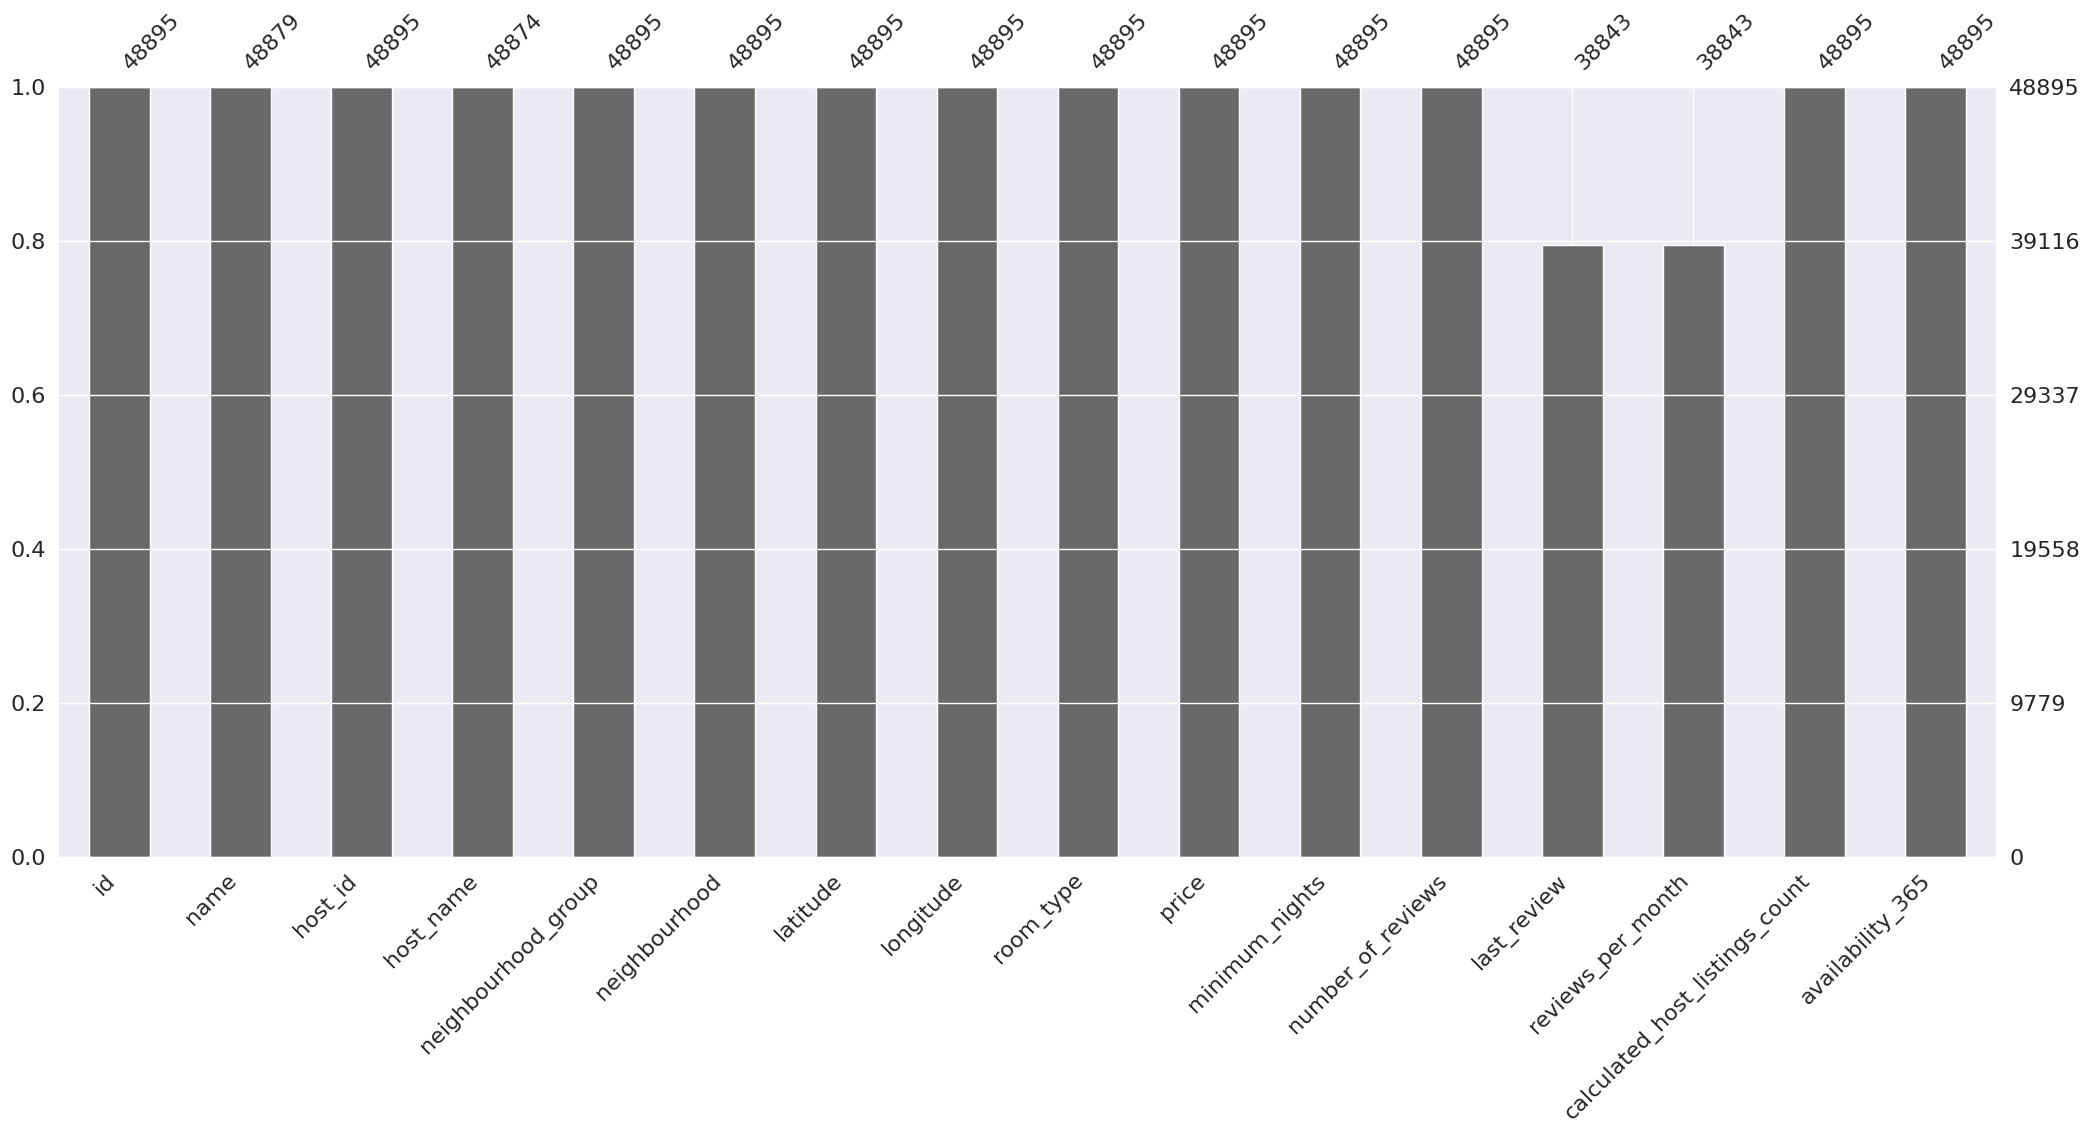

In [8]:
msno.bar(data);


In [9]:
pd.concat([
    (data.isna().sum()),
    (data.isna().sum() / len(data) * 100).apply(lambda x: np.round(x,2)).apply(str).apply(lambda x: x+"%")
], axis=1, keys=["Number of Missing Values", "Percent"])

,Number of Missing Values,Percent
id,0,0.0%
name,16,0.03%
host_id,0,0.0%
host_name,21,0.04%
neighbourhood_group,0,0.0%
neighbourhood,0,0.0%
latitude,0,0.0%
longitude,0,0.0%
room_type,0,0.0%
price,0,0.0%


In [10]:
# Xoá cột last_review vì chúng không cần thiết và sẽ không ảnh hưởng đến phân tích và tập dữ liệu.
data.drop(['last_review'], axis=1, inplace=True)

data['name'].fillna('Unknown', inplace=True)
data['host_name'].fillna('Unknown', inplace=True)

data['reviews_per_month'].fillna(0, inplace=True)

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Phân tích dữ liệu

In [11]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Từ tóm tắt thống kê, chúng ta có thể suy ra các điểm sau:

*  **price**: Giá trung bình của một phòng là 152,2 đô-la và độ lệch chuẩn của nó là 240 đô-la. Giá trị trung vị của price là 106 đô-la, tứ phân vị thứ 3 của price là 175 đô-la và giá tối đa là 10000 đô-la, đây là dấu hiệu rõ ràng rằng có những giá trị ngoại lệ trong biến giá price. Bên cạnh đó price chứa giá trị "min" bằng 0 nên chắc chắn chúng là những giá trị lỗi.
*  **minimum_nights**: trung bình 7 đêm được đặt trong một căn phòng và độ lệch chuẩn của nó là 20,5 đêm. Giá trị trung vị của minimum_nights là 3 đêm, tứ phân vị thứ 3 của minimum_nights là 5 đêm và tối đa là 1250, đây là một dấu hiệu rõ ràng cho thấy có các ngoại lệ có mặt trong biến minimum_nights.
*  **number_of_reviews**: trung bình cho một phòng là 23,27 và độ lệch chuẩn của nó là 44,55. Giá trị trung vị là 5, tứ phân vị thứ 3 của number_of_reviews là 24 và giá trị tối đa là 629, đây là dấu hiệu rõ ràng cho thấy có những giá trị ngoại lệ xuất hiện trong biến number_of_reviews.
*  **reviews_per_month**: Trung bình một phòng nhận được 1,37 đánh giá mỗi tháng và độ lệch chuẩn của nó là 1,68. Giá trị trung vị là 0,72, tứ phân vị thứ 3 của reviews_per_mont là 2,02 đêm và giá trị tối đa là 58,5, đây là một dấu hiệu rõ ràng cho thấy có những giá trị ngoại lệ có trong biến reviews_per_month.
*   **availability_365**: Trung bình, một phòng có sẵn trong 112,78 ngày/ một năm và độ lệch chuẩn của nó là 113 ngày. Giá trị trung vị là 45 ngày, tứ phân vị thứ 3 của availability_365 là 227 ngày và tối đa là 365, không có dấu hiệu cho thấy có các giá trị ngoại lệ.


Cột "price" là cột vô cùng quan trọng nên ta sẽ xử lý giá trị ngoại lệ của chúng.

Skew : 19.12


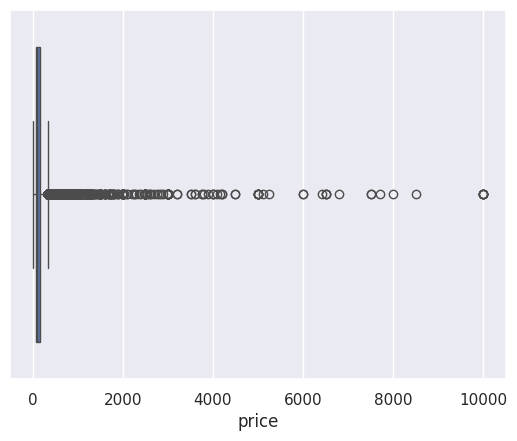

In [12]:
print('Skew :', round(data['price'].skew(), 2))
sns.boxplot(x = data['price']);

Sử dụng IQR để xử lý giá trị loại lệ (outliers)

In [13]:
def iqr(col):
  q1 = np.quantile(col, 0.25)
  q3 = np.quantile(col, 0.75)
  iqr = q3 - q1
  lower = q1 - (1.5 * iqr)
  upper = q3 + (1.5 * iqr)

  return lower,upper

In [14]:
lower,upper = iqr(data['price'])
data = data[(data.price>lower) & (data.price<upper)]

Skew : 0.92


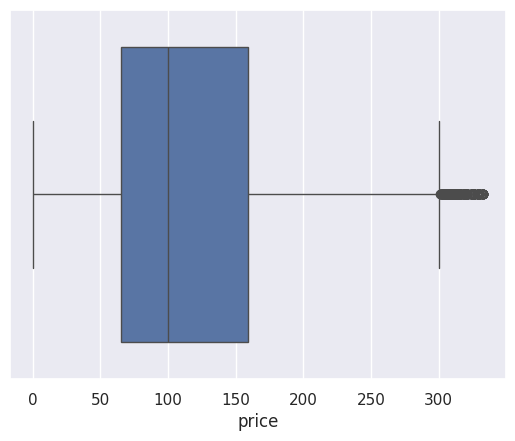

In [15]:
print('Skew :', round(data['price'].skew(), 2))
sns.boxplot(x = data['price']);

Tách các đặc trưng dạng numerical và categorical

In [16]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')
Numerical Variables:
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


## Phân tích đơn biến (Univariate)

id
Skew : -0.08


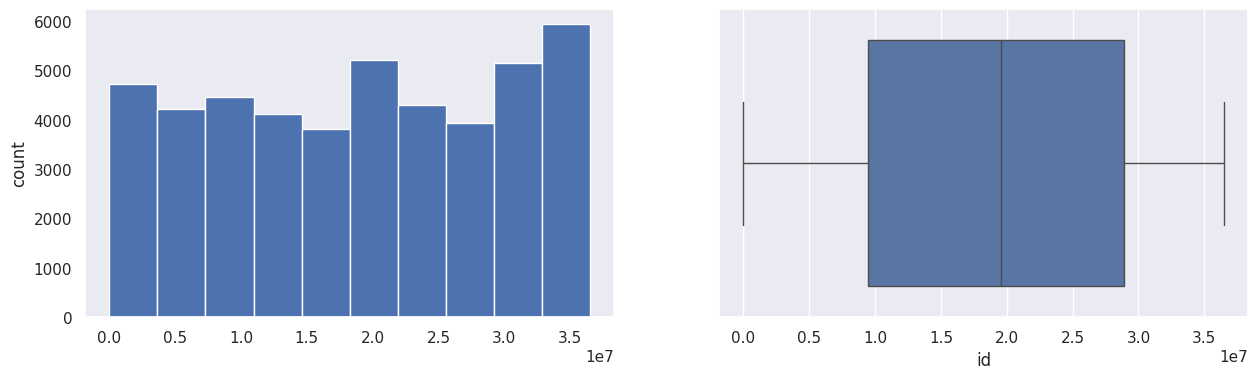

host_id
Skew : 1.24


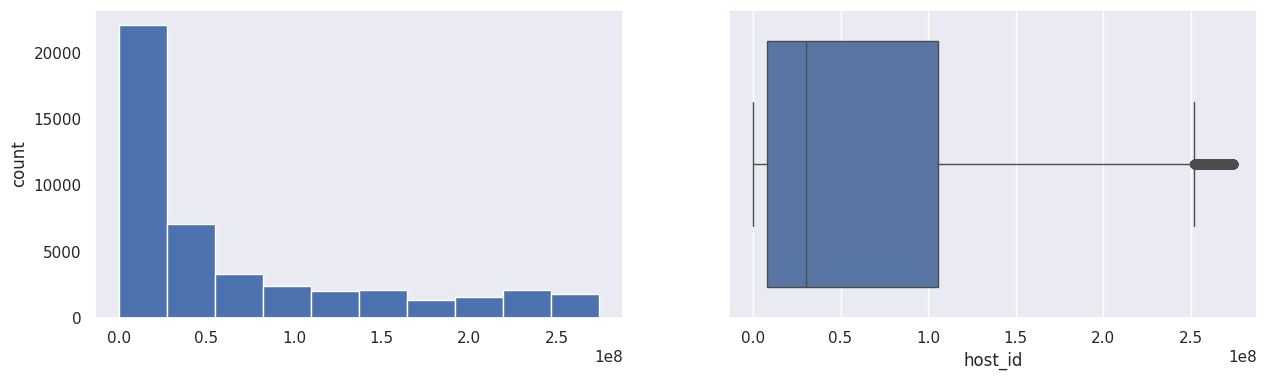

latitude
Skew : 0.26


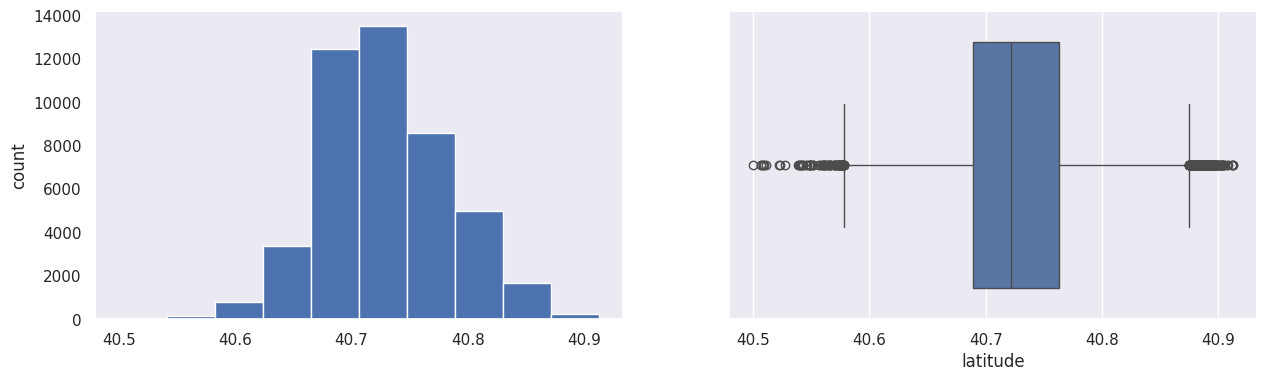

longitude
Skew : 1.24


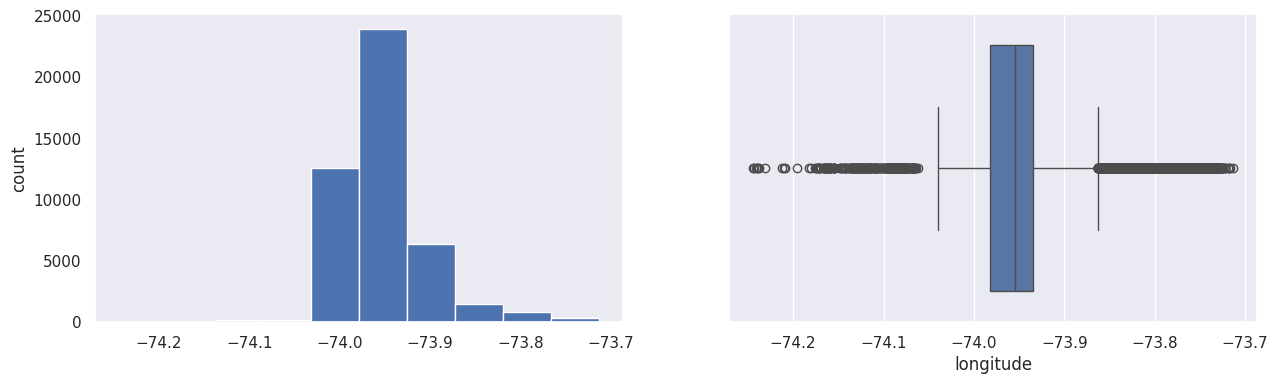

price
Skew : 0.92


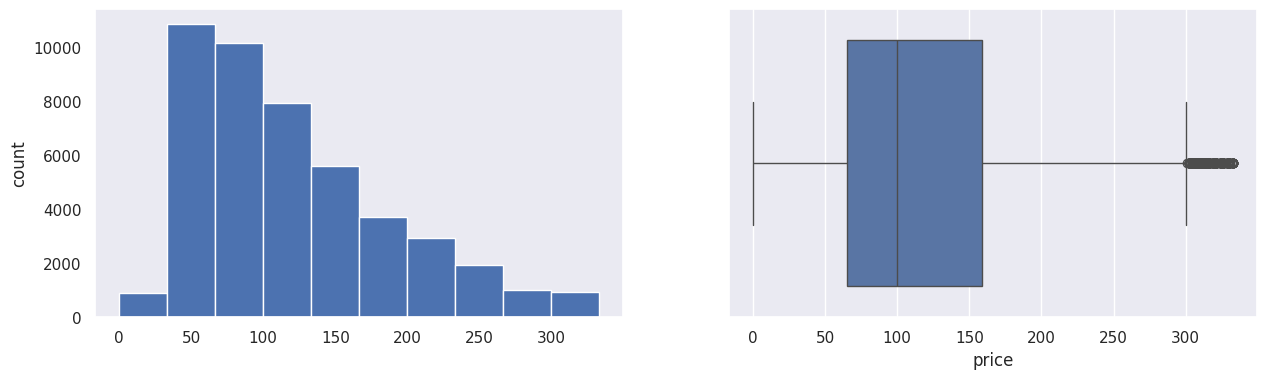

minimum_nights
Skew : 21.94


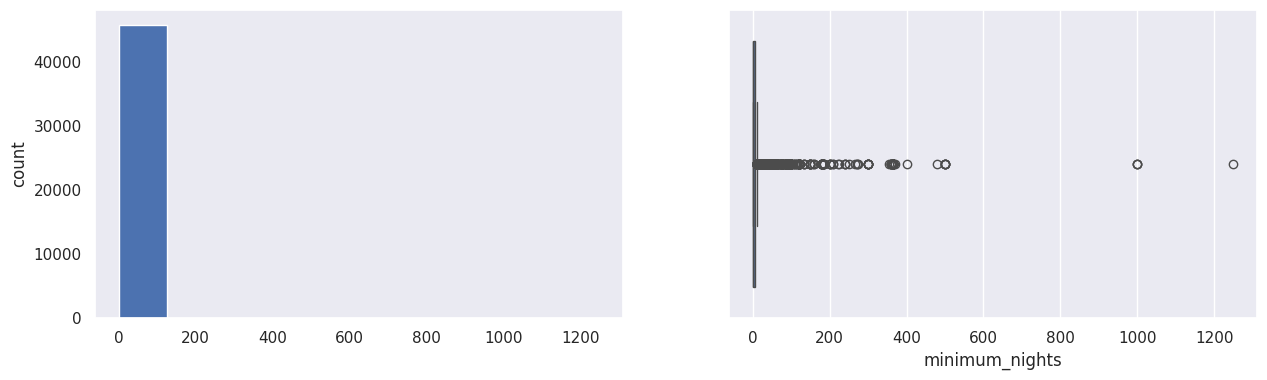

number_of_reviews
Skew : 3.63


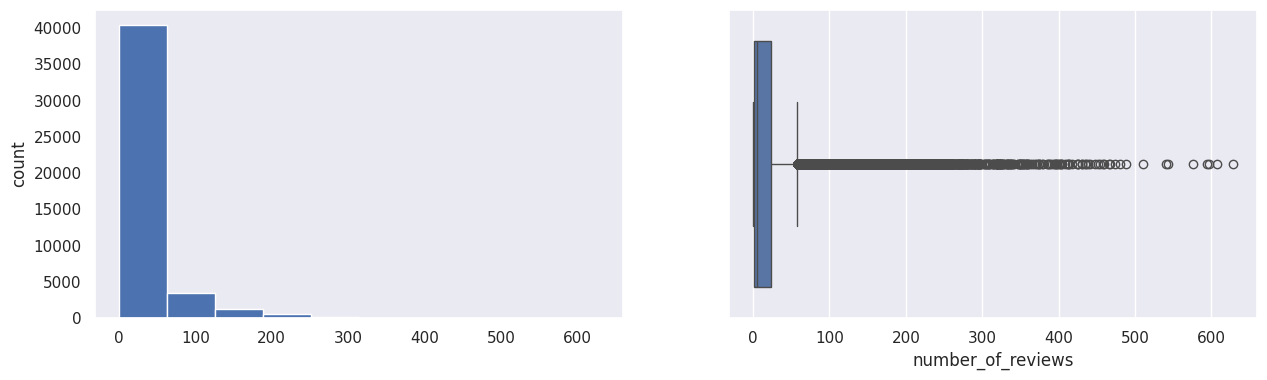

reviews_per_month
Skew : 3.32


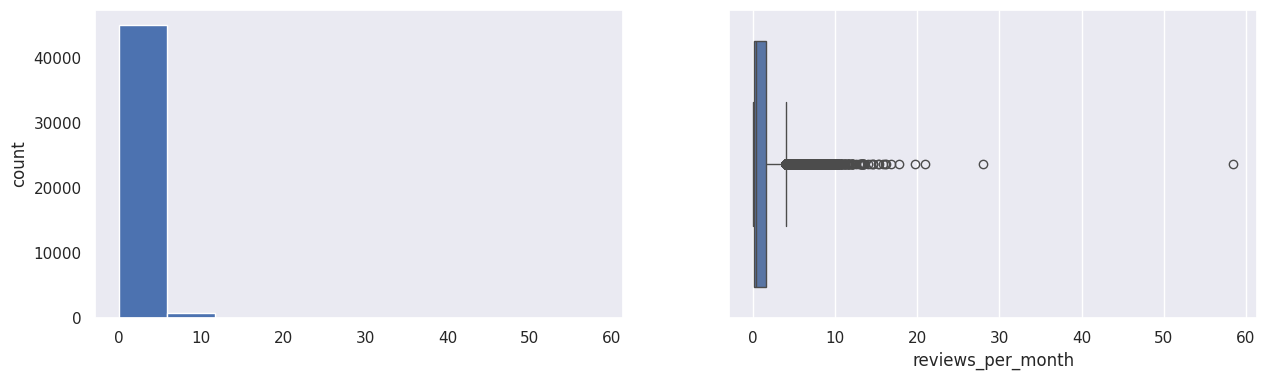

calculated_host_listings_count
Skew : 8.43


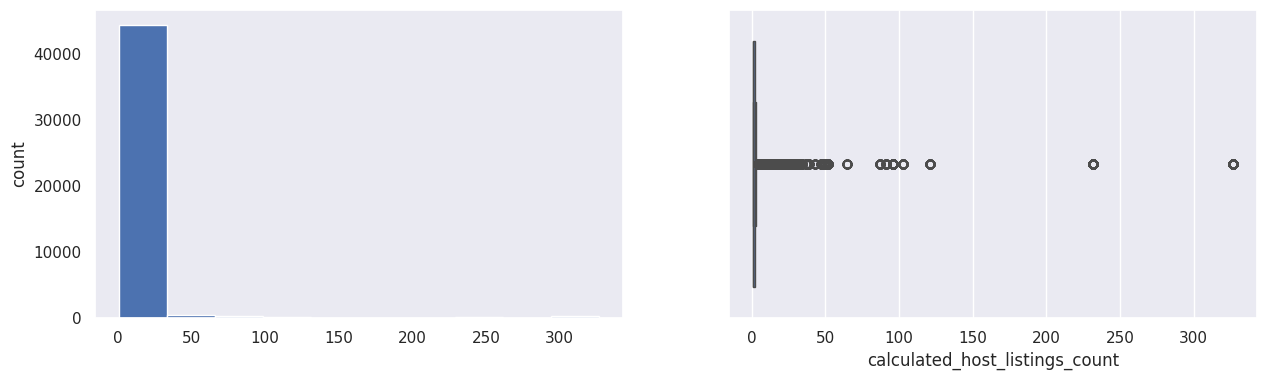

availability_365
Skew : 0.81


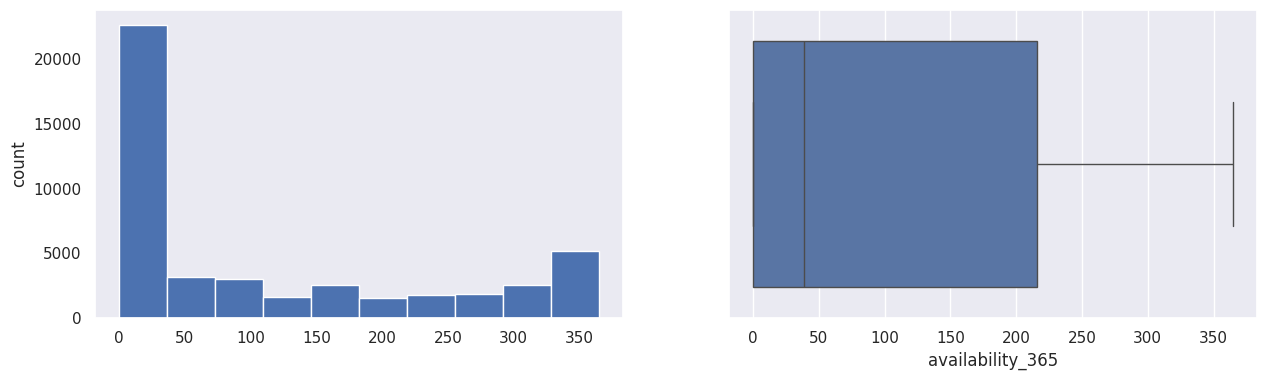

In [17]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Các biến minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count có sự lệch rất cao và trên một phạm vi lớn. Biến đổi log có thể giúp trong việc chuẩn hóa, để biến số này có thể duy trì một thang đo tiêu chuẩn với các biến khác.

Các biến phân loại được trực quan hóa bằng biểu đồ count plot.



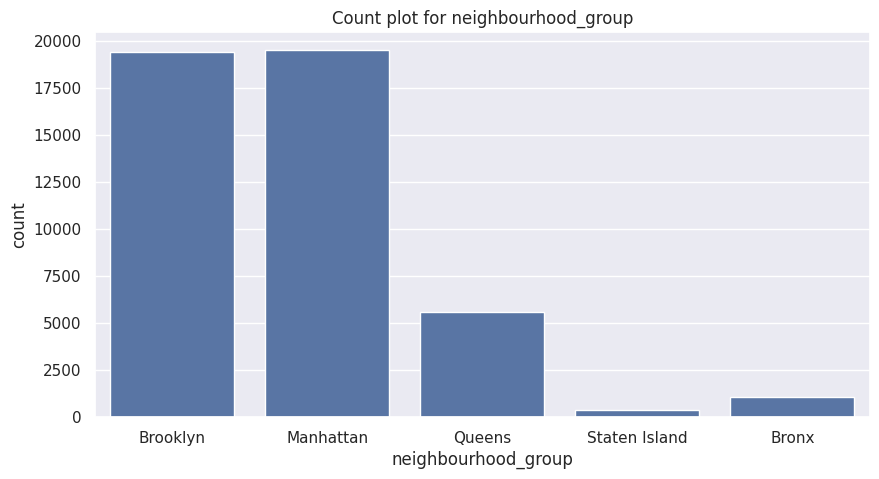

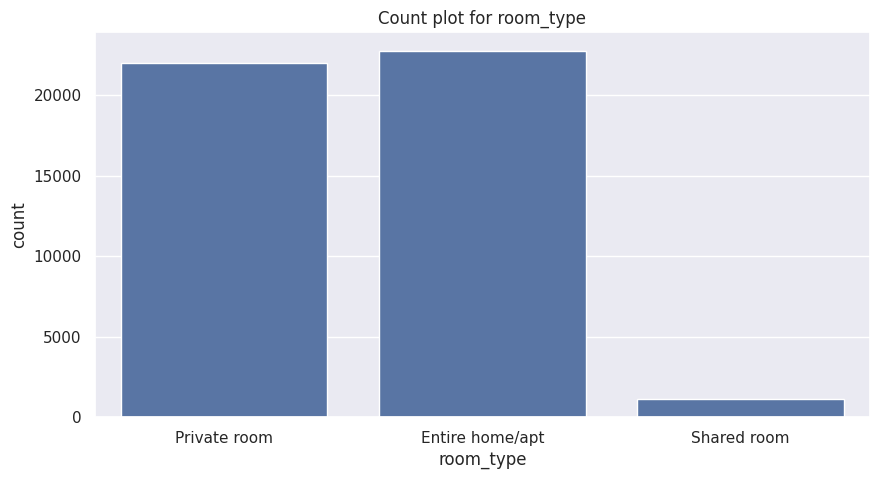

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='neighbourhood_group')
plt.title('Count plot for neighbourhood_group')
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=data, x='room_type')
plt.title('Count plot for room_type')
plt.show()

- Quận Brooklyn và Manhattan xếp ở vị trí đầu trong thị trường Airbnb
- Chủ yếu là loại phòng Private room và Entire home/apt

## Phân tích nhị biến (Bi-variate)
Phân tích Hai biến giúp hiểu cách các biến liên quan đến nhau và mối quan hệ giữa biến phụ thuộc và biến độc lập trong tập dữ liệu.

Đối với các biến số (Numerical variables), biểu đồ Pair plots và biểu đồ Scatter plots thường được sử dụng để thực hiện Phân tích Hai biến.

Một biểu đồ cột chồng (Stacked bar chart) có thể được sử dụng cho các biến phân loại (Categorical variables) nếu biến kết quả là một biến phân loại. Biểu đồ cột (Bar plots) có thể được sử dụng nếu biến kết quả là liên tục.



In [25]:
sns.pairplot(data[num_cols])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

- Không có sự tương quan tuyến tính nào giữa các biến.

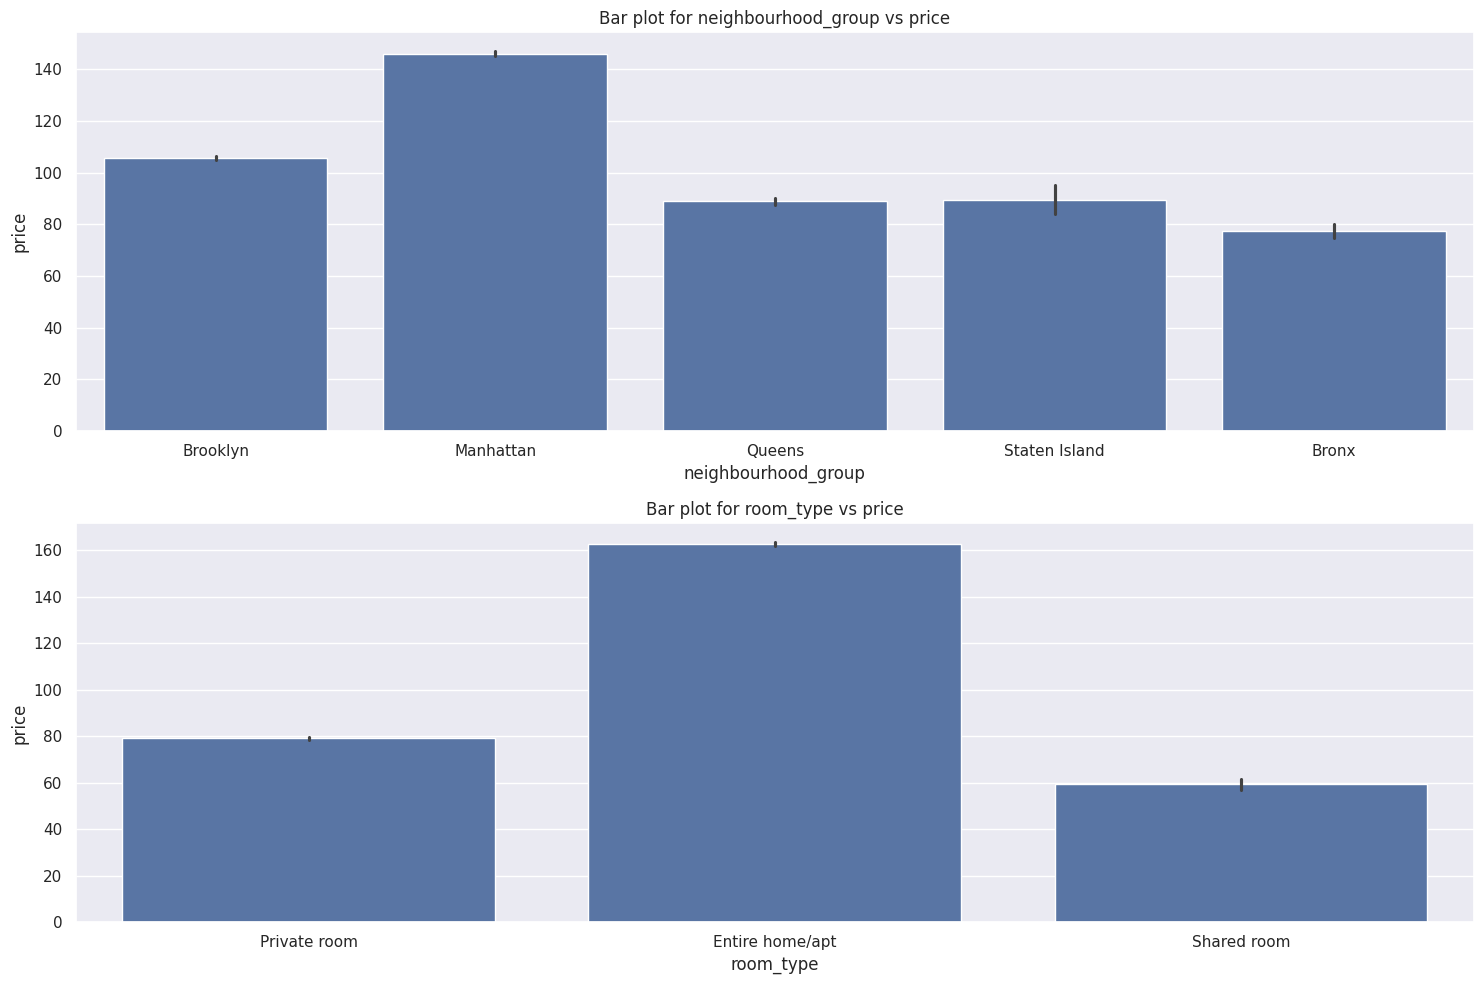

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

sns.barplot(data=data, x='neighbourhood_group', y='price', ax=ax[0])
ax[0].set_title('Bar plot for neighbourhood_group vs price')


sns.barplot(data=data, x='room_type', y='price', ax=ax[1])
ax[1].set_title('Bar plot for room_type vs price')

plt.tight_layout()
plt.show()

- Giá ở quận Manhattan cao nhất, theo sau là Brooklyn.
- Giá cho loại phòng "Entire home/apt" là cao nhất và Share room là thấp nhất.

## Phân tích đa biến (Multivariate)

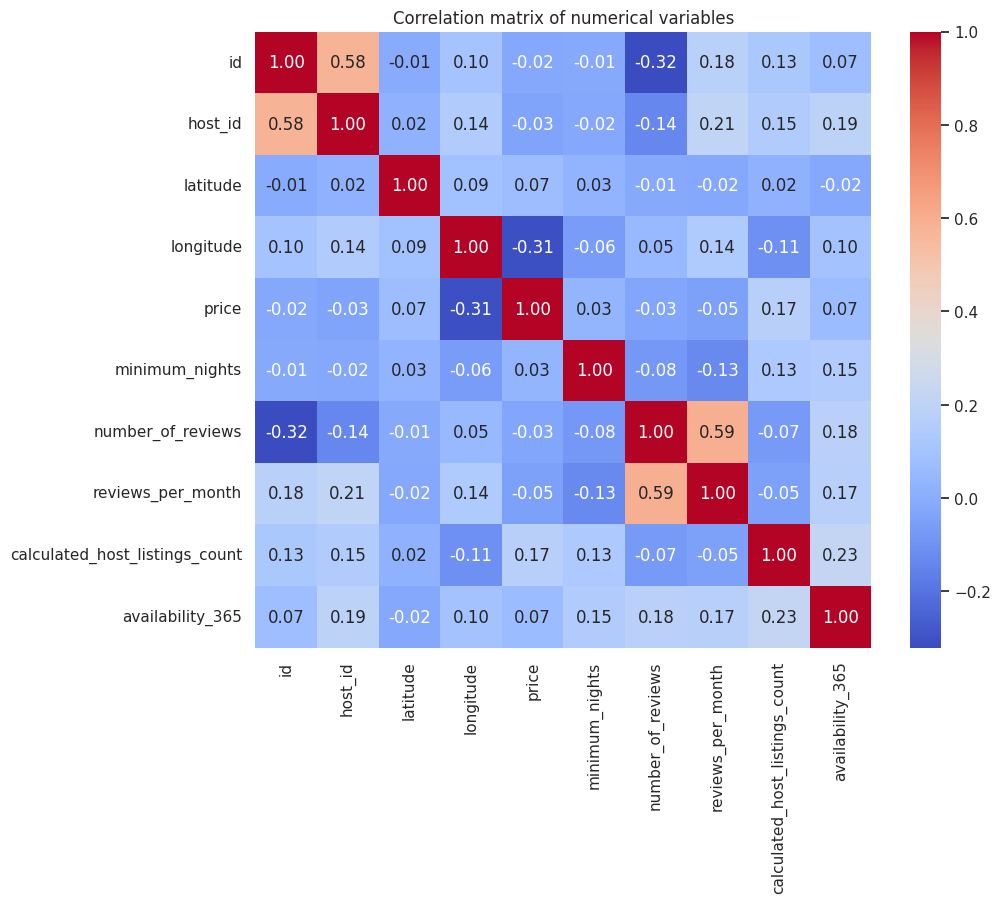

In [31]:
# Calculate the correlation matrix
corr = data[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation matrix of numerical variables')
plt.show()

- Có mối tương quan (0,58) giữa cột hosting_id và id.
- Có mối tương quan dương yếu (0,17) giữa cột giá và cột được tính_host_listings_count, điều này cho thấy rằng các chủ nhà có nhiều danh sách hơn có xu hướng tính giá cao hơn cho danh sách thuê của họ.
- Có mối tương quan dương vừa phải (0,23) giữa cột được tính_host_listings_count và cột có sẵn_365, điều này cho thấy rằng các chủ nhà có nhiều danh sách hơn có xu hướng có nhiều ngày sẵn sàng hơn trong 365 ngày tới.
- Có mối tương quan tích cực mạnh mẽ (0,58) giữa cột  number_of_reviews và cột  reviews_per_month, điều này cho thấy rằng danh sách có tổng số đánh giá cao hơn có xu hướng có nhiều đánh giá hơn mỗi tháng.

## Đặt vấn đề:
1. Phân bổ phạm vi giá đặt phòng Airbnb như thế nào? Đâu là phạm vi giá có mật độ cao nhất?

2. Quận "Neighborhood Group" nào có mức giá trung bình cho thuê cao nhất?

3. Hãy cho biết Sự phân bố giá của mỗi quận (Neighborhood Group)?

4. Danh sách những nơi cho thuê Airbnb đắt nhất và rẻ nhất?

5. Những căn hộ nào được khách hàng đặt phòng nhiều nhất?

6. Những khu phố (neighbourhood) nào có giá trung bình mỗi ngày cao nhất/ thấp nhất trong các quận (neighbourhood groups) ở NYC?

7. Đâu là những khu vực phổ biến nhất cho thuê Airbnb ở Thành phố New York?

8. Trên Airbnb, tổng số lượng của mỗi loại phòng là bao nhiêu? Loại phòng (room_type) nào có số lượng phòng cho thuê nhiều nhất?

9. Phân bố giá cho mỗi loại phòng như thế nào?

10. Những khu phố nào có số lượng căn hộ nhiều nhất trên airbnb?

11. Có xu hướng nào trong việc phân phối các loại phòng giữa các quận không?

12. Giá trung bình cho thuê Airbnb của từng loại phòng (room_type) ở mỗi quận (neighbourhood_group) nhau là bao nhiêu?

13. Thời gian lưu trú của dịch vụ cho thuê Airbnb ở Thành phố New York khác nhau tùy theo khu vực như thế nào? Các quận trung tâm có xu hướng thu hút thời gian lưu trú dài hơn hay ngắn hơn?

14. Tổng số đánh giá theo từng quận?

15. Giữa Manhattan và Brooklyn, khu vực nào đang hoạt động tốt hơn?

16. Tìm loại phòng được đánh giá nhiều nhất trong nhóm Khu phố (Neighborhood groups) mỗi tháng?

17. Có mối quan hệ như thế nào giữa số lượng đánh giá “number of reviews” và giá “price” trên Airbnb?

18. Trong các quận, giá trung bình nào được ưa chuộng để đạt được số lượng đánh giá tốt?

19. Khu vực nào có tỷ lệ cho thuê tốt nhất/tệ nhất?

20. Đâu là những chủ nhà (Host) hàng đầu dựa trên số lượng danh sách thuê trên toàn bộ thành phố New York?

21. Sự phân bổ của số lượng chủ nhà hoạt động trong từng quận ở NYC như thế nào?

22. Các chủ nhà (Host) nào có số lượng danh sách cho thuê nhiều nhất tại NYC?

23. Đâu là những chủ nhà (host) hàng đầu dựa trên doanh thu của họ?

24. Sự phân bổ của số lượng chủ nhà hoạt động trong từng quận ở NYC như thế nào?

25. Những khu vực nào có những chủ nhà (host) thu hút khách hàng nhất? Tại sao?

26. Số ngày phòng trống (Availability_365) của các quận tại thành phố NewYork?

27. Tình trạng sẵn có (Availability_365) của từng loại phòng theo từng quận?

28. Phân bố loại phòng (room_types) trên toàn bộ NYC như thế nào?








## Trực quan hóa dữ liệu

   

---


   **(1) Phân bổ phạm vi giá đặt phòng Airbnb như thế nào? Đâu là phạm vi giá có mật độ cao nhất?**







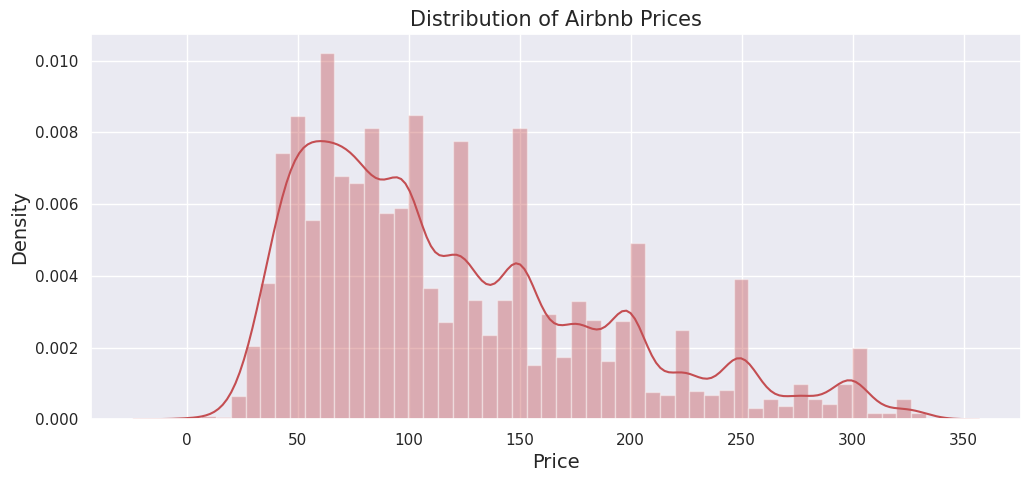

In [ ]:
plt.figure(figsize=(12, 5))
sns.distplot(data['price'],color=('r'))

plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Airbnb Prices',fontsize=15);

**Nhận xét:**

*   Phạm vi giá (price) dao động từ 20 đến 330 đô-la, với phần lớn giá cho thuê từ 50 đến 150 đô-la.
*   Sự phân bố của giá cao nhất trong khoảng từ 50 đến 150 đô-la, và mật độ thấp hơn ở các mức giá cao hơn và thấp hơn.






---


**(2) Quận "Neighborhood Group" nào có mức giá trung bình cho thuê cao nhất?**

In [ ]:
grouped = data.groupby("neighbourhood_group").mean()
neighbourhood_group_avg_price = grouped.reset_index()
neighbourhood_group_avg_price = round(neighbourhood_group_avg_price.rename(columns={"price": "avg_price"}),2)
neighbourhood_group_avg_price_sorted = neighbourhood_group_avg_price.sort_values(by='avg_price', ascending=False)
neighbourhood_group_avg_price_sorted[['neighbourhood_group', 'avg_price']].head()

,neighbourhood_group,avg_price
2,Manhattan,145.90
1,Brooklyn,105.70
4,Staten Island,89.24
3,Queens,88.90
0,Bronx,77.37


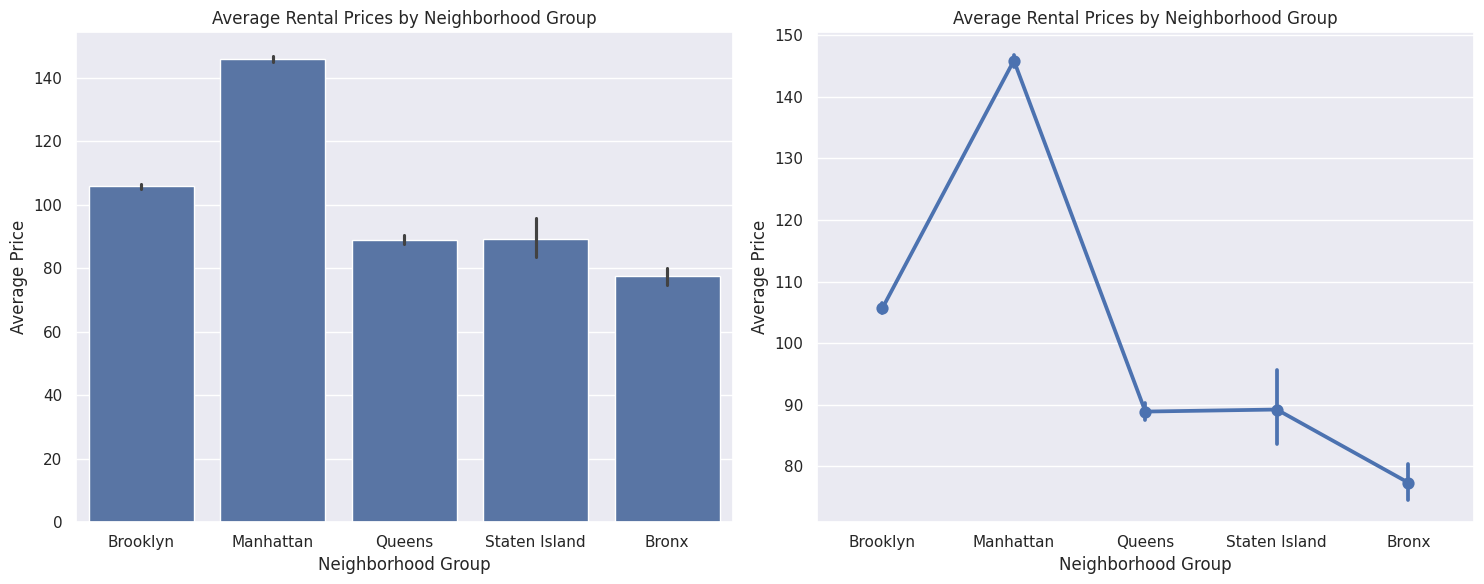

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ 1: Bar plot
sns.barplot(x='neighbourhood_group', y='price', data=data, estimator=np.mean, ax=axes[0])
axes[0].set_xlabel('Neighborhood Group')
axes[0].set_ylabel('Average Price')
axes[0].set_title('Average Rental Prices by Neighborhood Group')

# Biểu đồ 2: Point plot
sns.pointplot(x='neighbourhood_group', y='price', data=data, estimator=np.mean, ax=axes[1])
axes[1].set_xlabel('Neighborhood Group')
axes[1].set_ylabel('Average Price')
axes[1].set_title('Average Rental Prices by Neighborhood Group')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Nhận xét:**
* Giá trung bình cho thuê nhà ở tại New York rất đa dạng, có sự chệnh lệnh khá cao về khoảng giá giữa các quận. Manhattan có giá trung bình cao nhất là 146 đô-la/ngày, tiếp theo là Brooklyn và cuối cùng là Bronx có giá trung bình thấp nhất là 77 đô-la/ngày khu phố rẻ nhất ở NYC.
* Giá trung bình tại Queens và Staten Island khá là tương đồng nhau.
* Từ biểu đồ trực quan cho thấy chi phí sinh hoạt chung ở Thành phố New York ở trung tâm thành phố (Manhattan) cao hơn so với các quận ngoại ô. Điều này có thể là do Manhattan là quận đông dân nhất và có tầm quan trọng về mặt thương mại, do đó có nhu cầu nhà ở cao hơn ở các khu vực ngoại ô.




---
**(3) Như chúng ta đã thấy quận Bronx là nơi rẻ nhất để ở nên khách hàng có thể thích loại phòng nào và khu phố (neighborhood) nào tốt nhất để ghé thăm với chi phí phải chăng?**


In [ ]:
import plotly.express as px
bronx_data = data.loc[data.neighbourhood_group=='Bronx']

fig = px.bar(x='neighbourhood',y='price',data_frame=bronx_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Bronx Room type and Properties to Stay in Bronx at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**Nhận xét**
* Belmont là khu phố có chi phí đắt nhất cho loại phòng Entire Home/apt.
* Olinville là nơi đắt nhất cho loại phòng Private room.
* Pelham Bay là nơi đắt nhất cho loại phòng Share room.
* Entire home/apt có chi phí rẻ nhất ở Woodlawn.
* Private room có chi phí rẻ nhất ở Van Nest.
* Share room có chi phí rẻ nhất ở Morris Heights, Pehlam Gardens, Schuylerville and Van Nest.



---
**(4)Danh sách những khu phố ở Manhattan mà khách du lịch có thể thuê với chi phí phải chăng?**


In [ ]:
manhattan_data = data.loc[data.neighbourhood_group=='Manhattan']

fig = px.bar(x='neighbourhood',y='price',data_frame = manhattan_data.groupby(['neighbourhood','room_type']).mean().reset_index(),color='room_type',barmode='group',opacity=.7)
fig.update_layout(title='Manhattan Room type and Properties to Stay in Manhattan at Affordable Cost',yaxis_title='Average Price Per Night',yaxis=dict(showgrid=False,
        showticklabels=True),autosize=False,width=2000,height=700)
fig.show()

**Nhận xét**
* Tribeca là khu vực đắt nhất để thuê Entire home/apt

* NoHo là khu vực đắt nhất để lưu trú cho Private room và cả Share room.

* Private room có giá rẻ nhất tại Washington Heights.

* Share room giá rẻ nhất tại Roosevelt Island.

* Entire home/apt giá rẻ nhất tại Marble Hill.

---

**(5) Hãy cho biết Sự phân bố giá của mỗi quận (Neighborhood Group)?**

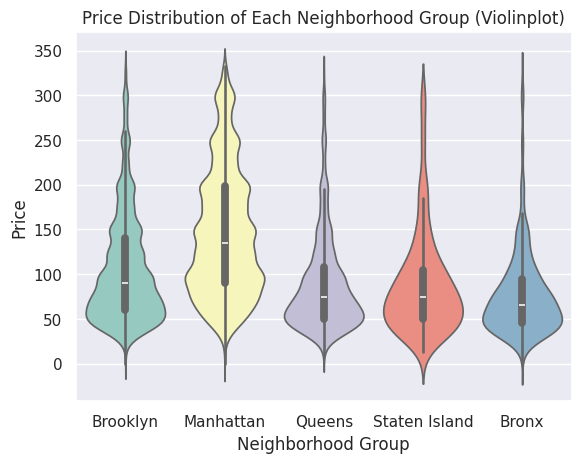

In [ ]:
sns.violinplot(x='neighbourhood_group', y='price', data=data, palette='Set3')

plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Price Distribution of Each Neighborhood Group (Violinplot)')
plt.show()




**Nhận xét:**
* Có sự phân bố giá rất cao ở Manhattan và Brooklyn, nhưng Manhattan đa dạng hơn về khoảng giá.
* Sự phân bố giá của Queens và Bronx khá là tương đồng.
* Hình ảnh trực quan này có thể giúp Airbnb đưa ra quyết định sáng suốt liên quan đến chiến lược định giá, điều chỉnh các đề xuất về giá, khuyến mãi và nỗ lực tiếp thị cho phù hợp với các khu vực cụ thể, nâng cao mức độ tương tác và sự hài lòng của người dùng.



---
**(6) Danh sách những nơi cho thuê Airbnb đắt nhất và rẻ nhất?**


**Đắt nhất?**

In [ ]:
data.nlargest(5,'price')[['name','neighbourhood_group','neighbourhood','host_name','room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
13798,Mid-Century Museum Sleepover,Brooklyn,Williamsburg,Cullen,Entire home/apt
15150,Midtown Sleep 6 Central Convenience,Manhattan,Midtown,Adam,Entire home/apt
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",Manhattan,Lower East Side,Fatima,Private room
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,Manhattan,Midtown,Mel,Entire home/apt
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,Manhattan,Upper West Side,Rated,Entire home/apt


 * Brooklyn là nơi có căn nhà cho thuê với mức giá đắt đỏ nhất, nhưng những căn còn lại thuộc về Manhataan.


**Rẻ nhất?**

In [ ]:
data.sort_values(by='price',ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]


,name,neighbourhood_group,neighbourhood,host_name,room_type
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,Sergii,Shared room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Aymeric,Entire home/apt


* Ngoài ra, danh sách phòng rẻ nhất chủ yếu đến từ Brooklyn.



---
**(7) Những căn hộ nào được khách hàng đặt phòng nhiều nhất?**


In [ ]:
highest_bookings= data.groupby(['neighbourhood_group','name'])['name'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)
top_ten_highest_bookings= highest_bookings[:10]
top_ten_highest_bookings

,neighbourhood_group,name,Most_Bookings
41716,Queens,Hillside Hotel,18
5073,Brooklyn,Brooklyn Apartment,12
11740,Brooklyn,Loft Suite @ The Box House Hotel,11
2716,Brooklyn,Artsy Private BR in Fort Greene Cumberland,10
7427,Brooklyn,Cozy Brooklyn Apartment,8
14808,Brooklyn,Private room in Williamsburg,8
38035,Manhattan,Unknown,8
41751,Queens,Home away from home,8
14765,Brooklyn,Private room in Brooklyn,8
3247,Brooklyn,Beautiful Brooklyn Brownstone,7


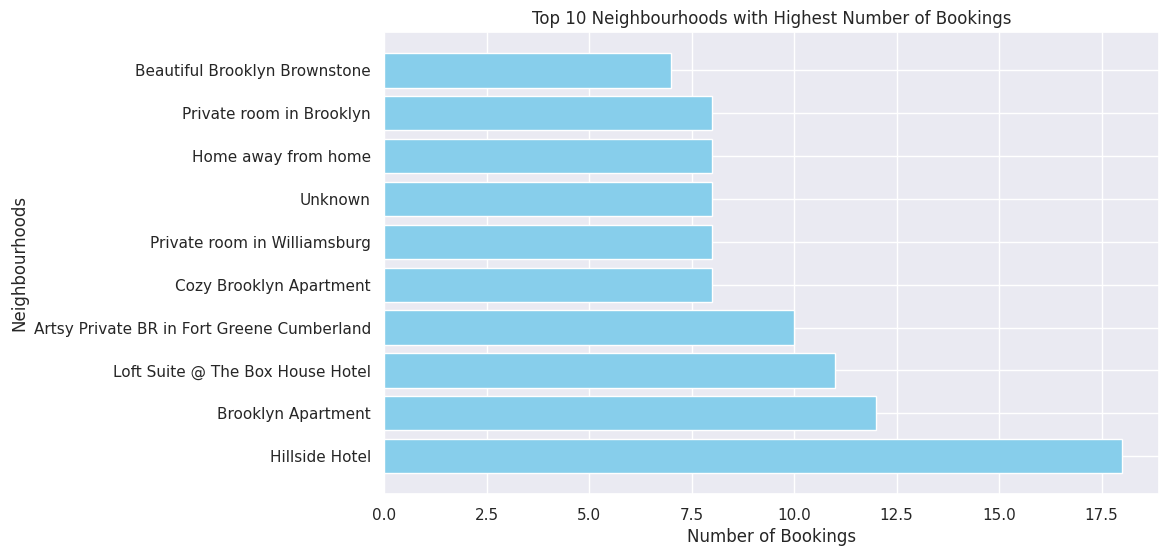

In [ ]:
neighbourhoods = top_ten_highest_bookings['name']
bookings = top_ten_highest_bookings['Most_Bookings']

plt.figure(figsize=(10, 6))
plt.barh(neighbourhoods, bookings, color='skyblue')
plt.xlabel('Number of Bookings')
plt.ylabel('Neighbourhoods')
plt.title('Top 10 Neighbourhoods with Highest Number of Bookings')
plt.show()

**Nhận xét:**
*   Chúng ta có thể thấy rằng, khách sạn Hillside Hotel ở Queens có số lượng đặt phòng nhiều nhất, tiếp theo là Brooklyn Apartment ở Brooklyn và Loft Suite ở Brooklyn.





---
**(8) Những khu phố (neighbourhood) nào có giá thuê trung bình mỗi ngày cao nhất/ thấp nhất trong các quận (neighbourhood groups) ở NYC?**


**Cao nhất?**

In [ ]:
df_ngrp= data.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [ ]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
121,Manhattan,Tribeca,212.495327
82,Brooklyn,Mill Basin,179.750000
44,Bronx,West Farms,122.000000


Text(0, 0.5, 'price')

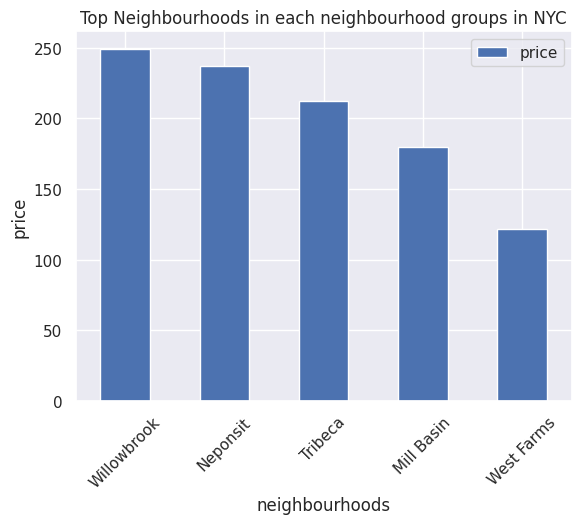

In [ ]:
top_neigh_each.plot.bar(x='neighbourhood', rot=45, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

Trong số những khu phố hàng đầu trong mỗi quận, có 2 khu phố đứng đầu, đó là Willowbrook - Staten Island và Neponsit - Queens.


**Thấp nhất?**


In [ ]:
neighbourhood_avg_price = data.groupby("neighbourhood").mean().reset_index().rename(columns={"price": "avg_price"})[['neighbourhood', 'avg_price']]

neighbourhood_avg_price = neighbourhood_avg_price.sort_values("avg_price").head(10)
neighbourhood_avg_price_sorted_with_group = neighbourhood_avg_price.join(data[['neighbourhood', 'neighbourhood_group']].drop_duplicates().set_index('neighbourhood'),
                                                                         on='neighbourhood')
display(neighbourhood_avg_price_sorted_with_group.style.hide_index())


neighbourhood,avg_price,neighbourhood_group
Bull's Head,47.333333,Staten Island
Hunts Point,50.500000,Bronx
Tremont,51.545455,Bronx
Soundview,53.466667,Bronx
Corona,54.412698,Queens
New Dorp,57.000000,Staten Island
Bronxdale,57.105263,Bronx
New Dorp Beach,57.400000,Staten Island
Grant City,57.666667,Staten Island
Concord,58.192308,Staten Island


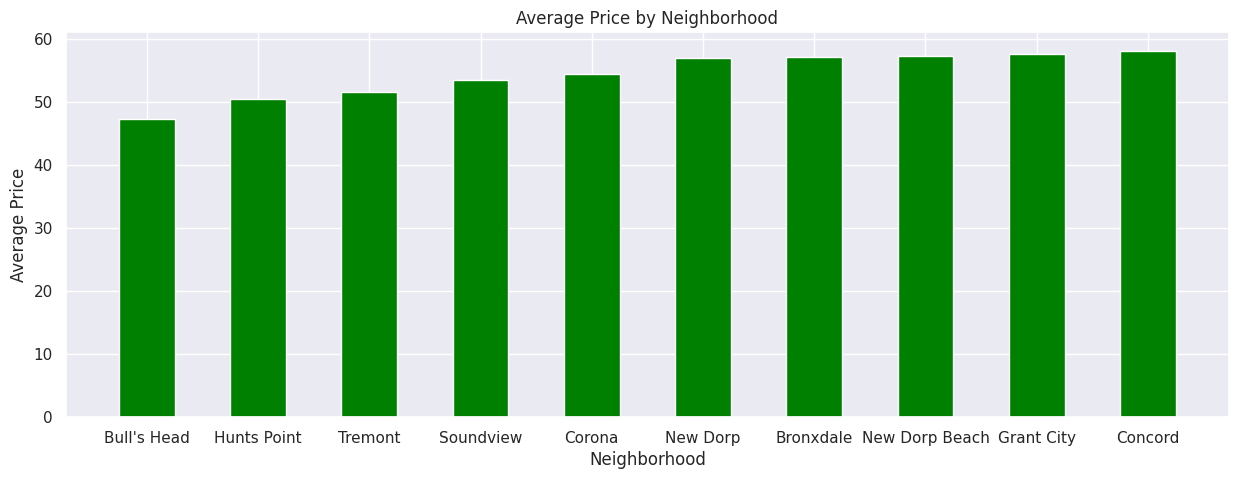

In [ ]:
# Extract the values from the dataset
neighborhoods = neighbourhood_avg_price_sorted_with_group['neighbourhood']
prices = neighbourhood_avg_price_sorted_with_group['avg_price']

# Create the bar plot
plt.figure(figsize=(15,5))
plt.bar(neighborhoods, prices,width=0.5, color = 'green')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Average Price by Neighborhood')

# Show the plot
plt.show()

**Nhận xét:**
* Tất cả các khu dân cư có mức giá trung bình thấp nhất đều nằm ngoài khu vực trung tâm thành phố (Bronx, Queens, and Staten Island).
* Những khu dân cư này có thể hấp dẫn đối với người thuê nhà hoặc người mua đang tìm kiếm các lựa chọn nhà ở giá cả phải chăng hơn trong khu vực Thành phố New York.



---
   **(9) Đâu là những khu vực phổ biến nhất cho thuê Airbnb ở Thành phố New York?**




In [ ]:
counts = data['neighbourhood_group'].value_counts()
Top_Neighborhood_group = counts.reset_index()
Top_Neighborhood_group.columns = ['Neighborhood_Groups', 'Listing_Counts']
total_listings = Top_Neighborhood_group['Listing_Counts'].sum()
Top_Neighborhood_group['Percentage'] = (Top_Neighborhood_group['Listing_Counts'] / total_listings) * 100
Top_Neighborhood_group

,Neighborhood_Groups,Listing_Counts,Percentage
0,Manhattan,19501,42.469184
1,Brooklyn,19415,42.281894
2,Queens,5567,12.123786
3,Bronx,1070,2.330241
4,Staten Island,365,0.794895


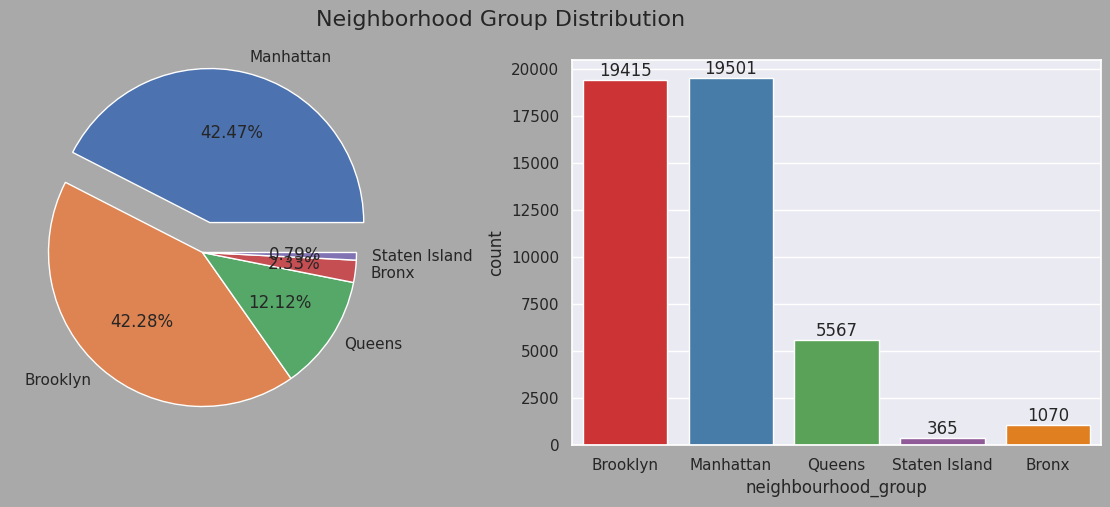

In [ ]:
plt.figure(figsize= (15,5)).set_facecolor('darkgrey')
plt.subplot(1,2,1)
plt.suptitle("Neighborhood Group Distribution", fontsize=16)
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
plt.pie(data.groupby(['neighbourhood_group'])['neighbourhood_group'].count().sort_values(ascending= False), labels = labels, explode=(.2,0,0,0,0),autopct='%2.2f%%')


plt.subplot(1,2,2)
ax= sns.countplot(data=data, x= 'neighbourhood_group', palette='Set1')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

**Nhận xét:**
* Chúng ta có thể thấy rằng Manhattan và Brooklyn có mật độ thuê nhà ở cao nhất (chiếm hơn 80%) và Staten Island có mật độ thấp nhất.

* Từ đây, ta có thể thấy khu vực Manhattan và Brooklyn là khu vực có tiềm năng nhất. Ta nên tập trung quảng bá hình ảnh và lập ra các chiến lược để thu hút đầu tư và khách thuê nhà vào khu vực này.



---
**(10) Trên Airbnb, tổng số lượng của mỗi loại phòng là bao nhiêu? Loại phòng (room_type) nào có số lượng phòng cho thuê nhiều nhất?**



In [ ]:
top_room_type = data['room_type'].value_counts().reset_index()
top_room_type.columns = ['Room_Type', 'Total_counts']
top_room_type

,Room_Type,Total_counts
0,Entire home/apt,22784
1,Private room,21996
2,Shared room,1138


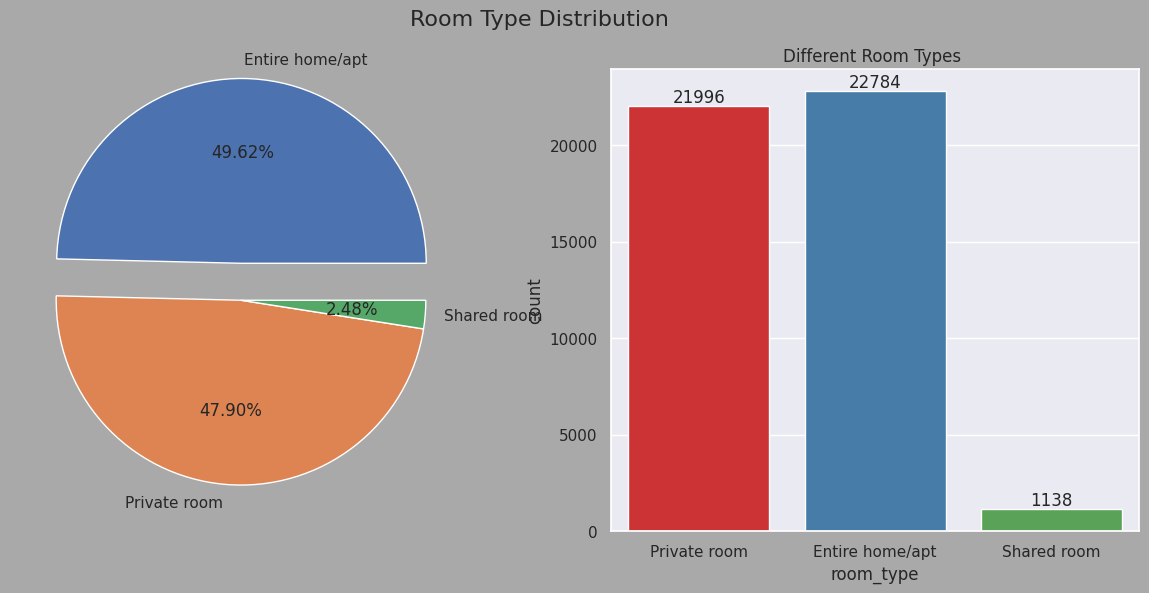

In [ ]:
plt.figure(figsize=(15,6)).set_facecolor('darkgrey')

plt.subplot(1,2,1)
plt.suptitle("Room Type Distribution", fontsize='16')
plt.pie(data.groupby(['room_type'])['room_type'].count().sort_values(ascending=False), labels=['Entire home/apt', 'Private room', 'Shared room'], explode=(0.2, 0, 0), autopct='%2.2f%%')

plt.subplot(1,2,2)
ax = sns.countplot(data=data, x='room_type', palette='Set1')  # Sử dụng palette='Set1' để đặt màu khác nhau cho các loại phòng
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Different Room Types ')
plt.show()


**Nhận xét:**
* Phần lớn trên Airbnb là cho thuê toàn bộ ngôi nhà hoặc căn hộ (Entire home/apt) với 22784 căn, tiếp theo là các phòng riêng (private room) với 21996 phòng và phòng chung (shared room) với 1138 phòng.
* Từ hình ảnh trực quan cho thấy khách du lịch sử dụng Airbnb có nhiều lựa chọn chỗ ở để lựa chọn, bao gồm phòng riêng, căn hộ và phòng chung.



---
**(11) Phân bố giá cho mỗi loại phòng như thế nào?**


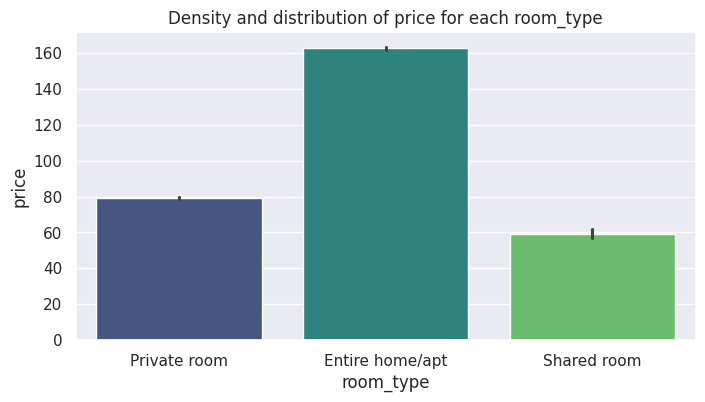

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='room_type', y='price', data=data, palette='viridis')
plt.title('Density and distribution of price for each room_type')
plt.show()

**Nhận xét:**
* Sự chênh lệch giữa giá trung bình của Private room và Shared room là không nhiều nhưng có sự khác biệt rất lớn (gấp đôi) về loại phòng Entire home/apt so với các loại phòng khác.
* Từ hình ảnh trực quan này có thể cung cấp thông tin về chiến lược định giá cho các loại phòng khác nhau, thiết lập mức giá cạnh tranh và theo định hướng thị trường



---
**(12) Những khu phố nào có số lượng căn hộ nhiều nhất trên Airbnb?**

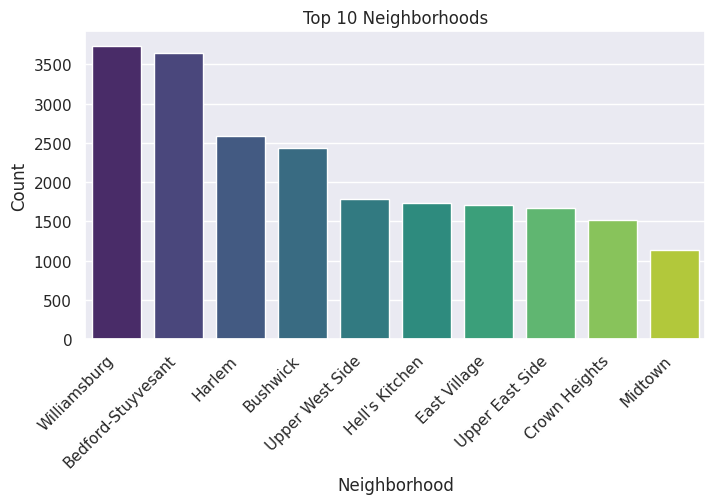

In [ ]:
plt.figure(figsize=(8, 4))
plot = sns.countplot(x='neighbourhood', data=data, palette='viridis', order=data['neighbourhood'].value_counts().index[:10])

plt.title('Top 10 Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Count')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Nhận xét:**
* Các khu dân cư hàng đầu ở New York về số lượng cho thuê nhà ở là Williamsburg, Bedford-Stuyvesant, Harlem
* Các khu dân cư hàng đầu chủ yếu nằm ở Brooklyn và Manhattan. Điều này có thể là do thực tế là các quận này có tổng dân số cao hơn và nhu cầu về nhà ở cao hơn.


**(13) Có xu hướng nào trong việc phân phối các loại phòng giữa các quận không?**

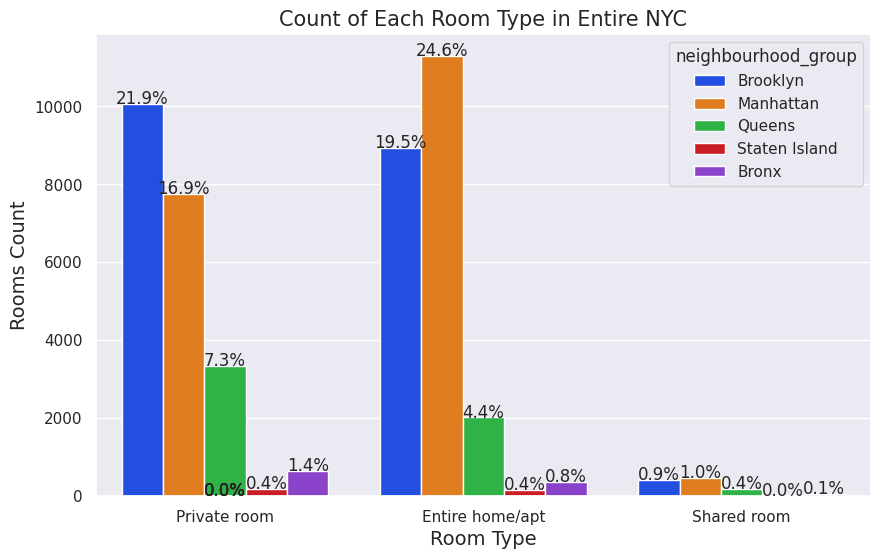

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.countplot(x='room_type', hue='neighbourhood_group', data=data, palette='bright')
total = len(data['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + 0.1
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Count of Each Room Type in Entire NYC', fontsize=15)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Rooms Count', fontsize=14)
plt.show()

**Nhận xét:**

Có một xu hướng rõ ràng trong việc phân phối các loại phòng giữa các khu phố ở New York City (NYC). Dựa vào biểu đồ, chúng ta có thể thấy:
* Private room ở Brooklyn ở vị trí đầu chiếm 21,9% , tiếp theo là Manhattan với 16,9%, vị trí cuối 0,4% Private room là của State Island.
* Manhattan chiếm vị trí top đầu trong tổng số cho thuê Entire home/apt, ở vị trí xếp sau là Brooklyn với 19,5%.
* Rất ít số phòng cho thuê kiểu "shared room" trên Airbnb. Nơi không có hoặc rất ít phòng cho thuê kiểu "shared room" là Staten Island và Bronx.

↪ Brooklyn, Queens và Bronx có nhiều loại Private room hơn, trong khi Manhattan, nơi có số lượng danh sách phòng cho thuê cao nhất trong toàn bộ New York City, có nhiều loại phòng Entire home/apt hơn; Share room không phổ biến ở tất cả các khu vực.





**(14) Giá trung bình cho thuê Airbnb của từng loại phòng (room_type) ở mỗi quận (neighbourhood_group) nhau là bao nhiêu?**

In [ ]:
avg_preffered_price_df = data.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df = data.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df = avg_preffered_price_df.sort_values(by=['Entire home/apt', 'Private room', 'Shared room'], ascending=False)
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Manhattan,181.621136,98.057700,75.939785
Brooklyn,148.202080,70.283443,48.036496
Queens,131.328388,65.732319,46.989691
Staten Island,121.089286,62.292553,57.444444
Bronx,112.195592,60.595679,47.254237


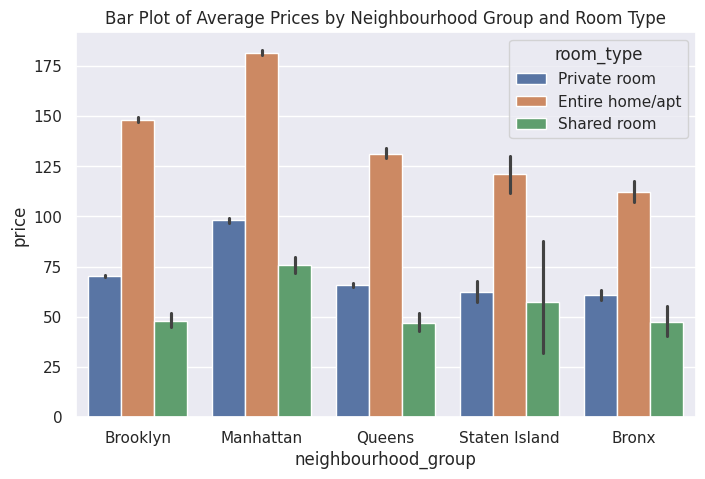

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Bar Plot of Average Prices by Neighbourhood Group and Room Type')
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = data)
plt.show()

**Nhận xét:**
* Ở đây, chúng ta có thể quan sát rằng từ biểu đồ, chúng ta có thể chắc chắn nói rằng Manhattan là một địa điểm đắt đỏ nhất vì giá của mỗi loại phòng cao hơn so với loại phòng với các quận khác. Giá của các loại phòng ở Queens, Staten Island và Bronx gần như tương tự.
* Các hiểu biết thu được từ trực quan hóa này có thể thông tin cho các chiến lược giá cả cho các loại phòng khác nhau trong các khu phố cụ thể.
Airbnb có thể tinh chỉnh các chương trình khuyến mãi giá, giảm giá, hoặc nỗ lực tiếp thị dựa trên các thông tin thu thập được.



---

**(15) Thời gian lưu trú của dịch vụ cho thuê Airbnb ở Thành phố New York khác nhau tùy theo khu vực như thế nào? Các quận trung tâm có xu hướng thu hút thời gian lưu trú dài hơn hay ngắn hơn?**



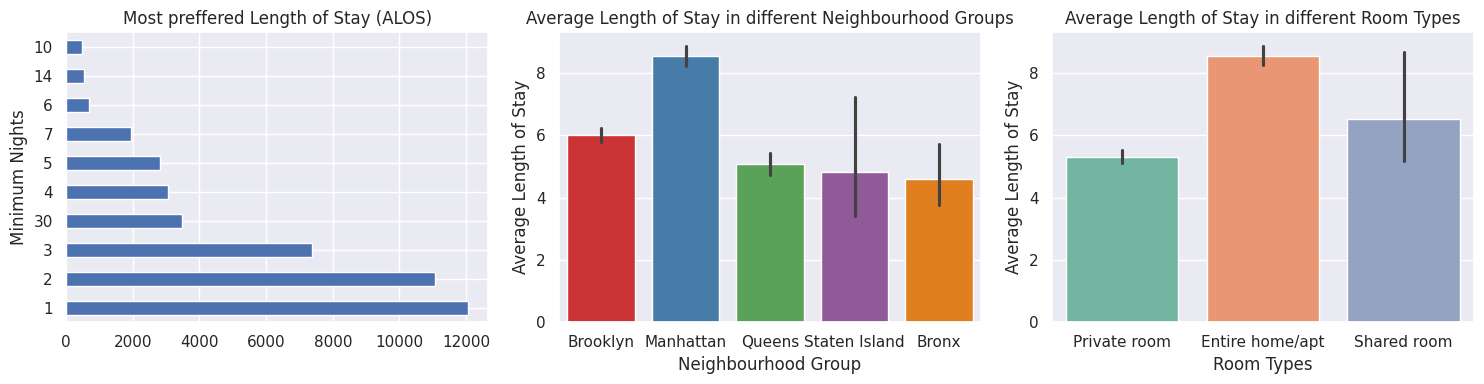

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Univariate analysis
# Most preffered Length of Stay (ALOS)
alos = data['minimum_nights'].value_counts()[:10].plot(kind='barh', ax=ax[0], color='C0')  # Chọn màu 'C0' từ bảng màu 'Set1'
alos.set(title='Most preffered Length of Stay (ALOS)', ylabel='Minimum Nights')

# Bi-variate analysis
# Minimum Nights Vs Neighbourhood Group
bar = sns.barplot(data=data, x='neighbourhood_group', y='minimum_nights', ax=ax[1], palette='Set1')  # Sử dụng palette='Set1'
bar.set(xlabel='Neighbourhood Group', ylabel='Average Length of Stay', title='Average Length of Stay in different Neighbourhood Groups')

# Bi-variate analysis
# Minimum Nights Vs Room Type
bar = sns.barplot(data=data, x='room_type', y='minimum_nights', ax=ax[2], palette='Set2')  # Sử dụng palette='Set1'
bar.set(xlabel='Room Types', ylabel='Average Length of Stay', title='Average Length of Stay in different Room Types')

plt.tight_layout()
plt.show()


**Nhận xét:**
* Hầu hết các khách hàng đều thuê 1,2 hoặc 3 đêm.
* Manhattan có thời gian lưu trú trung bình cao nhất, tiếp theo là Brooklyn, Queens, Staten Island và cuối cùng là Bronx.
* Toàn bộ ngôi nhà/căn hộ (Entire home/apt) có thời gian lưu trú dài hơn so với phòng riêng tư (Private room) và phòng chia sẻ (share room).

Nhìn chung, các quận trung tâm (Manhattan, Brooklyn) có xu hướng thu hút thời gian lưu trú dài hơn các quận khác.








---
**(16) Tổng số đánh giá theo từng quận?**


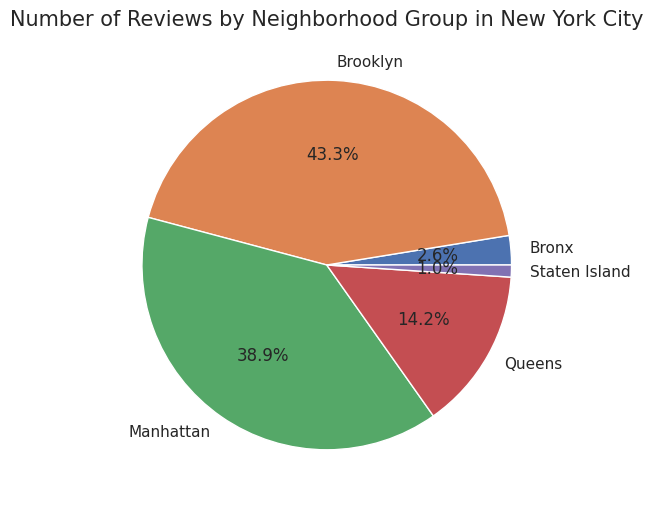

In [ ]:
# Group the data by neighborhood group and calculate the total number of reviews
reviews_by_neighbourhood_group = data.groupby("neighbourhood_group")["number_of_reviews"].sum()

# Create a pie chart
plt.pie(reviews_by_neighbourhood_group, labels=reviews_by_neighbourhood_group.index, autopct='%1.1f%%')
plt.title("Number of Reviews by Neighborhood Group in New York City", fontsize='15')

# Display the chart
plt.show()

**Nhận xét:**
* Brooklyn chiếm tỷ lệ lớn nhất trong tổng số đánh giá trên Airbnb, với 43.3%, tiếp theo là Manhattan với 38.9%.

* Queens có tỷ lệ đánh giá tổng thể lớn thứ ba, với 14.2%, tiếp theo là Bronx với 2.6% và Staten Island với 1.0%.

* Dữ liệu cho thấy rằng dịch vụ Airbnb phổ biến hơn ở Brooklyn và Manhattan so với các nhóm khu vực khác.

* Mặc dù có ít phòng cho thuê hơn, Brooklyn có nhiều đánh giá hơn trên Airbnb so với Manhattan. Điều này có thể chỉ ra rằng người dùng Airbnb tại Brooklyn có khả năng cao hơn để để lại đánh giá, hoặc các dịch vụ tại Brooklyn phổ biến hoặc thành công hơn trong việc tạo ra đánh giá tích cực. Đáng chú ý là có thể có một số yếu tố khác có thể góp phần vào sự khác biệt này trong các đánh giá, như chất lượng của các dịch vụ hoặc các đặc điểm của những người du lịch sử dụng Airbnb trong những khu vực này.



---

**(17) Giữa Manhattan và Brooklyn, khu vực nào đang hoạt động tốt hơn?**

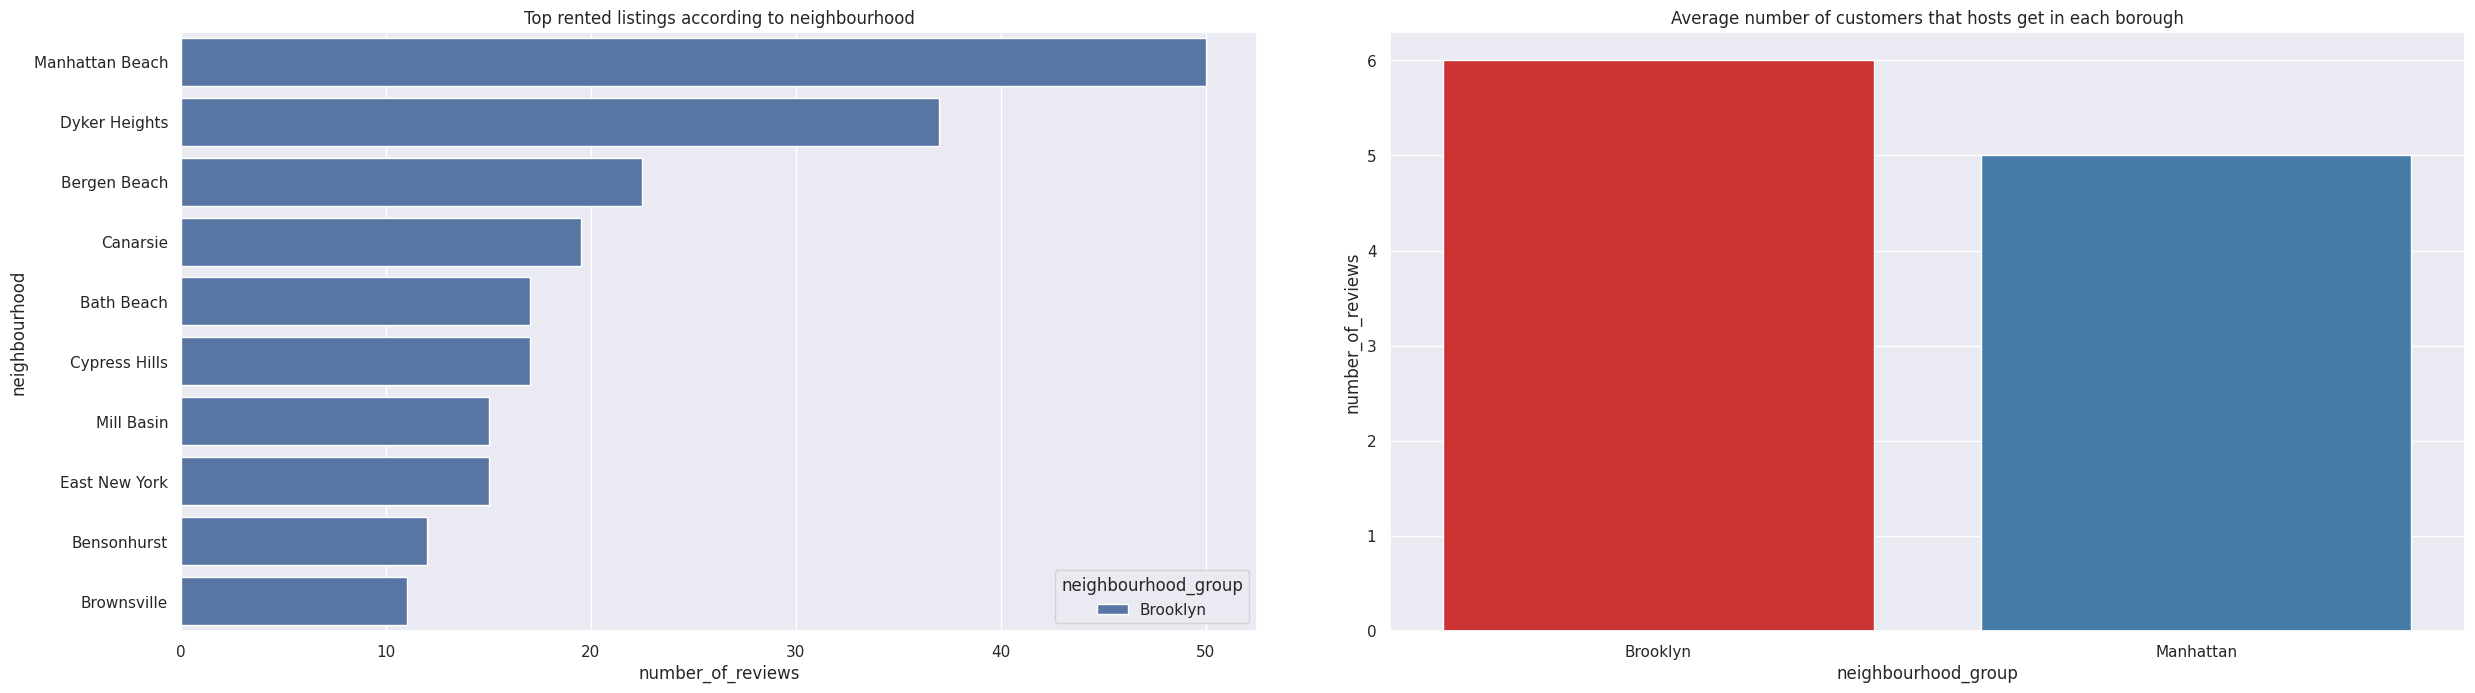

In [ ]:
top_listings = data.loc[(data.neighbourhood_group == 'Manhattan') | (data.neighbourhood_group == 'Brooklyn')].groupby('neighbourhood_group').median().sort_values(by='number_of_reviews', ascending=False).reset_index()
top10_listings = data.loc[(data.neighbourhood_group == 'Manhattan') | (data.neighbourhood_group == 'Brooklyn')].groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by='number_of_reviews', ascending=False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize=(25, 8), squeeze=True)
fig.tight_layout(pad=5)
sns.barplot(x='number_of_reviews', y='neighbourhood', data=top10_listings, orient='h', ci=False, hue='neighbourhood_group', dodge=False, ax=axis[0], estimator=np.median).set(title='Top rented listings according to neighbourhood')
sns.barplot(x='neighbourhood_group', y='number_of_reviews', data=top_listings, ci=False, dodge=False, ax=axis[1], palette='Set1').set(title='Average number of customers that hosts get in each borough')
plt.show()

**Nhận xét:**
* Chủ nhà Brooklyn nhận được nhiều khách hàng hơn, đáng chú ý nhất là ở Manhattan Beach, Dyker Heights & Bergen Beach.



---
**(18) Tìm loại phòng được đánh giá nhiều nhất trong nhóm Khu phố (Neighborhood groups) mỗi tháng?**


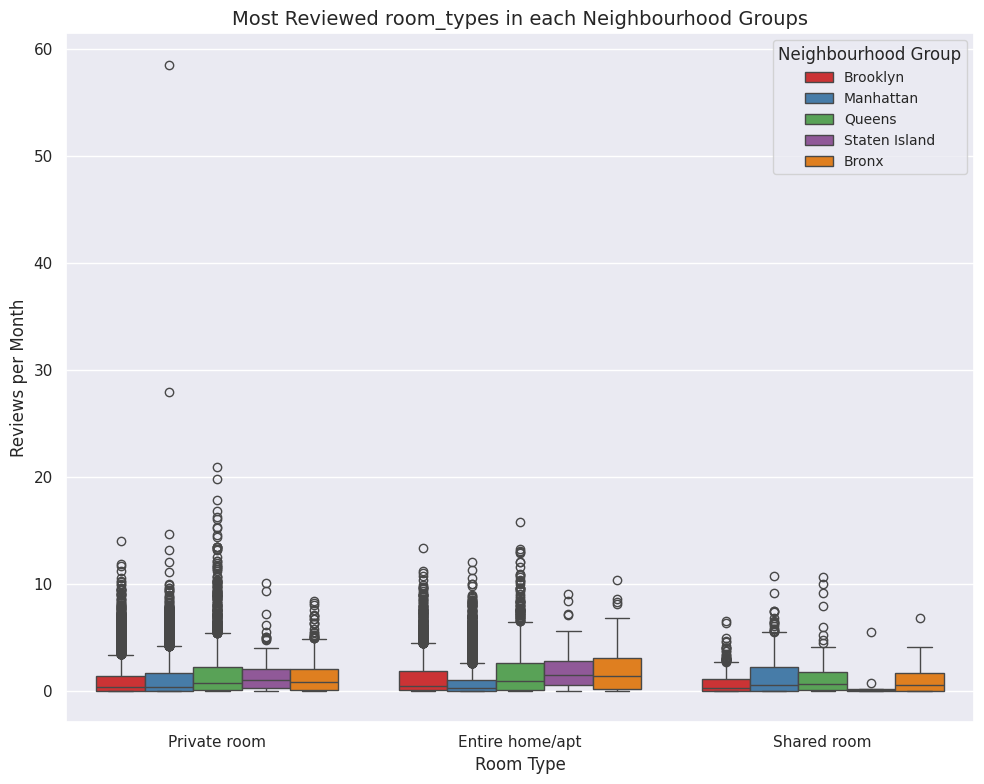

In [ ]:
# create a figure with a default size of (10, 8)
f, ax = plt.subplots(figsize=(10, 8))

# create a boxplot that displays the number of reviews per month for each room type in the Airbnb NYC dataset
ax = sns.boxplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group', data=data, palette='Set1')

# set the title of the plot
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups', fontsize='14')

# add labels for the x and y axes
ax.set_xlabel('Room Type', fontsize='12')
ax.set_ylabel('Reviews per Month', fontsize='12')

# add a legend
ax.legend(title='Neighbourhood Group', title_fontsize='12', fontsize='10')

# adjust the layout to prevent clipping of labels
plt.tight_layout()

# show the plot
plt.show()


In [ ]:
summary_table = data.groupby(['room_type', 'neighbourhood_group'])['reviews_per_month'].median().reset_index().pivot_table(index='room_type', columns='neighbourhood_group', values='reviews_per_month')

print(summary_table)


neighbourhood_group  Bronx  Brooklyn  Manhattan  Queens  Staten Island
room_type                                                             
Entire home/apt       1.40      0.46       0.25    0.91           1.48
Private room          0.79      0.33       0.40    0.71           1.00
Shared room           0.52      0.26       0.58    0.66           0.06


**Nhận xét:**
* Loại phòng "Entire home/apt" là loại phòng có số lượng đánh giá cao nhất mỗi tháng.
* Nhìn chung, ta có thể thấy rằng Staten Island có tỷ lệ đánh giá hàng tháng cao nhất cho cả Entire home/apt và Private room, trong khi Manhattan có tỷ lệ đánh giá thấp nhất cho cả hai loại phòng. Brooklyn và Queens có tỷ lệ đánh giá trung bình hàng tháng tương đối gần nhau cho cả hai loại phòng.



---
**(19) Có mối quan hệ như thế nào giữa số lượng đánh giá “number of reviews” và giá “price” trên Airbnb?**


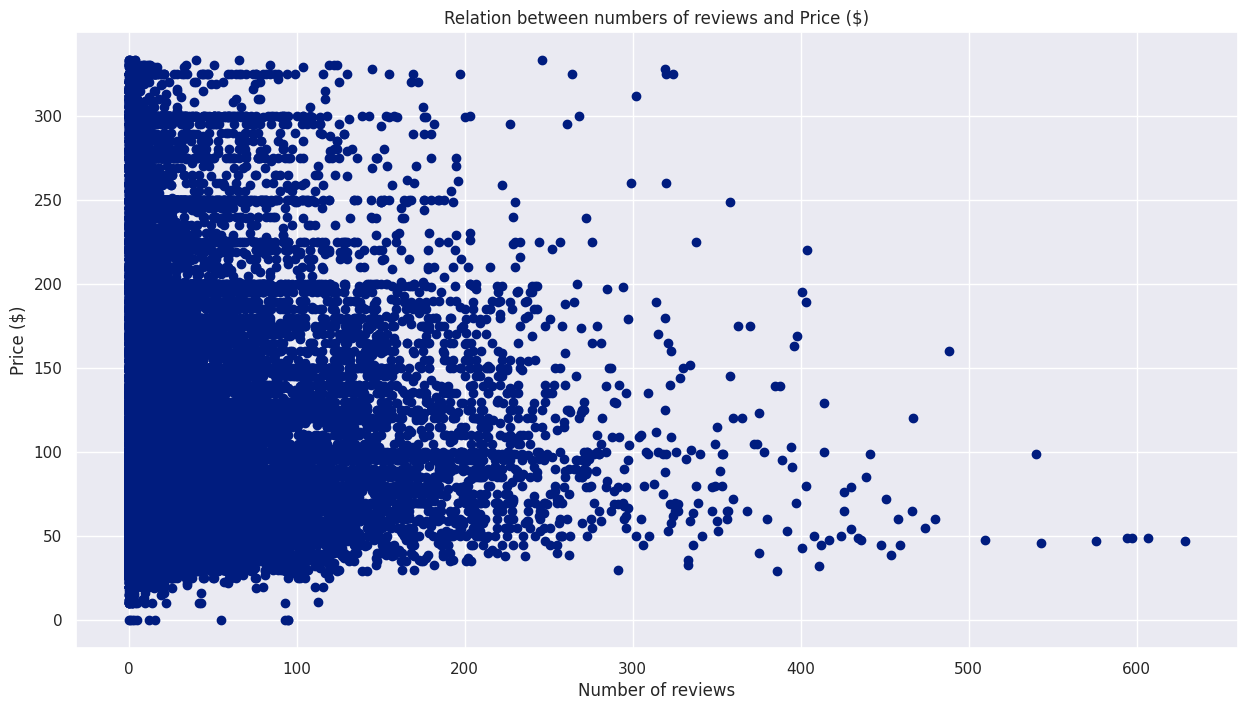

In [ ]:
plt.figure(figsize = (15,8))
plt.style.use('seaborn-v0_8-dark-palette')
plt.scatter(data['number_of_reviews'],data['price'])
plt.title('Relation between numbers of reviews and Price ($)')
plt.xlabel('Number of reviews')
plt.ylabel('Price ($)')
plt.show()

**Nhận xét:**
* Có thể vì thị trường cạnh tranh nên giá tương đối thấp để thu hút nhiều khách hàng hơn và nhiều đánh giá hơn sau đó. Từ biểu đồ phân tán này, rõ ràng là giá cao hơn sẽ làm giảm số lượng đánh giá.



---
**(20) Trong các quận, giá trung bình nào được ưa chuộng để đạt được số lượng đánh giá tốt?**


In [ ]:
df_succesfull_hosts=data.sort_values(by=['room_type','number_of_reviews'],ascending=False).groupby(['neighbourhood_group','room_type'])['neighbourhood_group','room_type','number_of_reviews','price'].head(10)
avg_preffered_price_df = df_succesfull_hosts.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df = avg_preffered_price_df.sort_values(by='Entire home/apt', ascending=False)
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Manhattan,174.0,80.5,56.900000
Brooklyn,162.2,75.5,38.700000
Staten Island,97.9,50.6,57.444444
Queens,88.3,50.0,44.500000
Bronx,87.1,48.1,45.100000


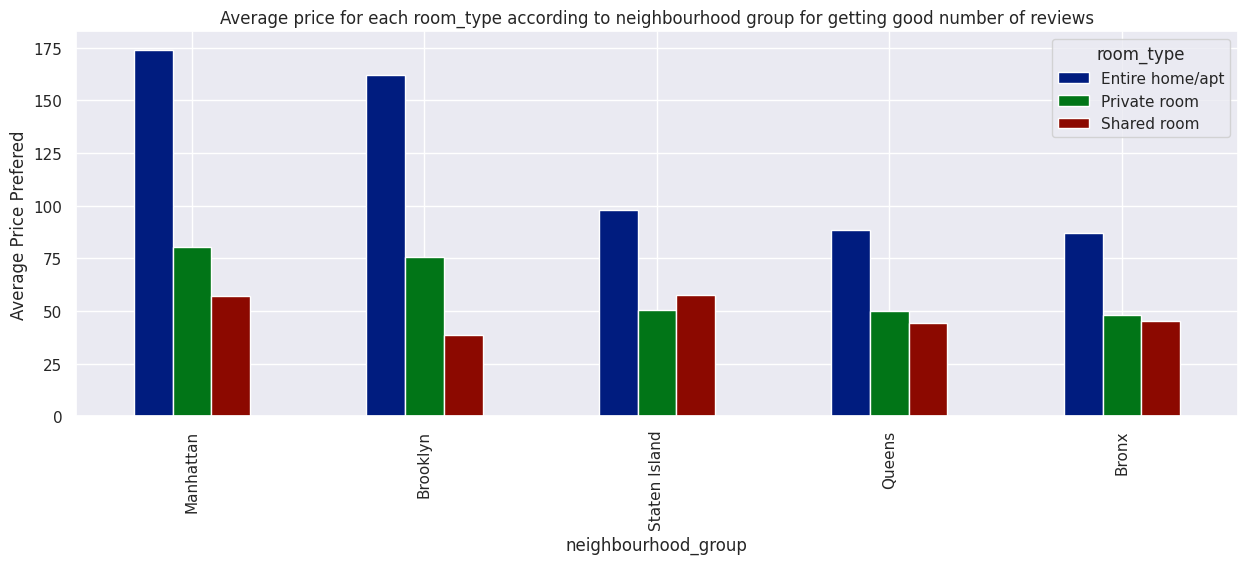

In [ ]:
avg_preffered_price_df.plot.bar(figsize=(15,5),ylabel='Average Price Prefered')
plt.title("Average price for each room_type according to neighbourhood group for getting good number of reviews");

**Nhận xét**
* Ta có thể thấy rằng mức giá yêu thích thì thấp hơn mức giá trung bình như đã phân tích ở trên, có mức giá chênh lệch khoảng 10 đô-la.
* Nhóm đề xuất rằng để có nhiều số lượng đánh giá tốt thì nên hạ giá bằng cách có nhiều chương trình khuyến mãi cho khách hàng và cải thiện chất lượng dịch vụ tốt hơn!



---
**(21) Khu vực nào có tỷ lệ cho thuê tốt nhất/tệ nhất?**


In [ ]:
# Tính toán số lượng listings và số lượng reviews theo khu vực
host_count = data.groupby('neighbourhood_group').size().reset_index(name='listings_count').sort_values('listings_count', ascending=False)
customer_count = data.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index(name='reviews_count').sort_values('reviews_count', ascending=False)
# Kết hợp dữ liệu về số lượng listings và số lượng reviews theo khu vực
borough_data = pd.merge(host_count, customer_count, on='neighbourhood_group')
# Tính toán tỷ lệ cho thuê (rental rate)
borough_data['rental_rate'] = (borough_data['reviews_count'] / borough_data['listings_count']).round(2)
borough_data

,neighbourhood_group,listings_count,reviews_count,rental_rate
0,Manhattan,19501,428128,21.95
1,Brooklyn,19415,475936,24.51
2,Queens,5567,155719,27.97
3,Bronx,1070,28185,26.34
4,Staten Island,365,11536,31.61


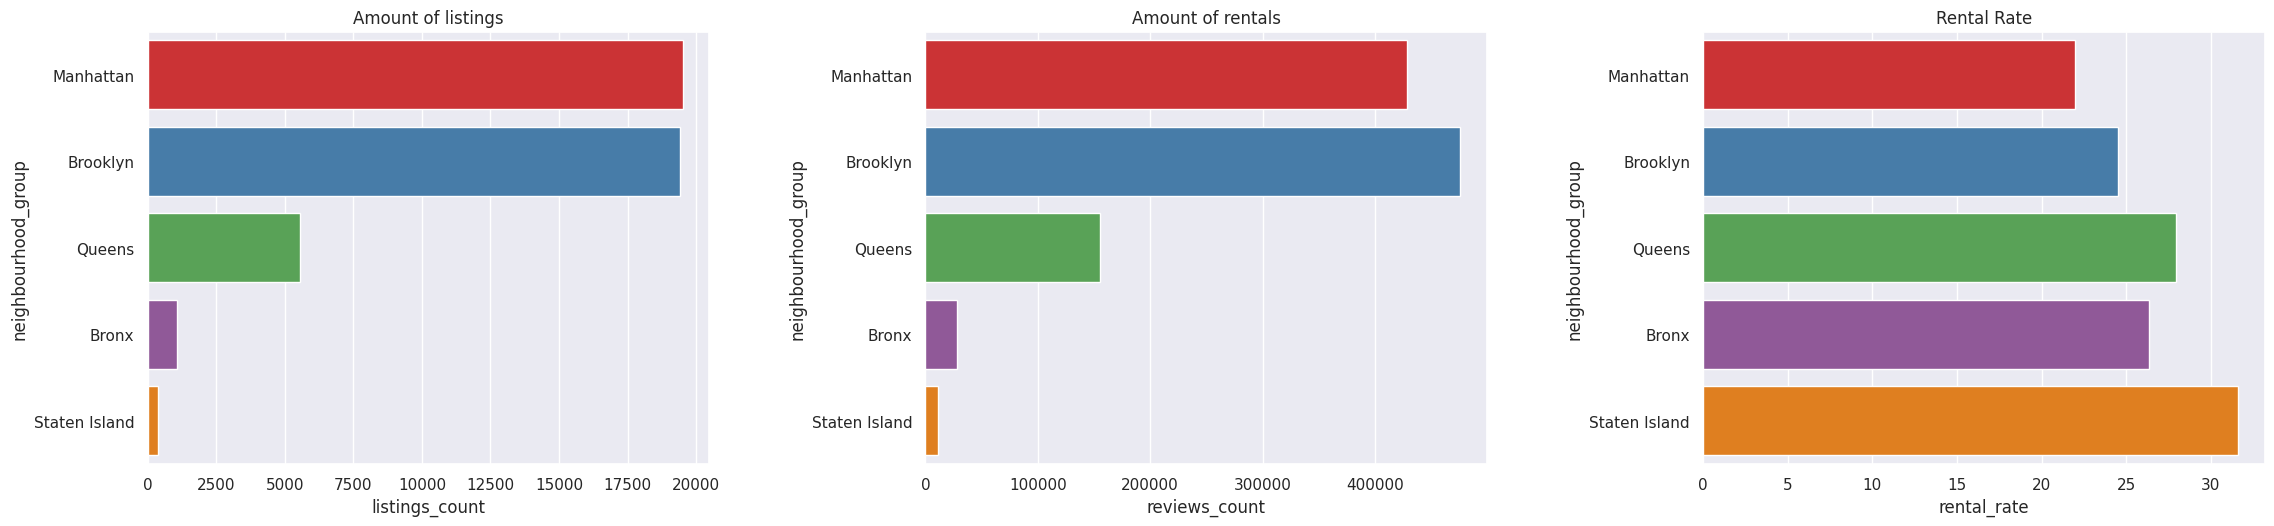

In [ ]:
fig, axis = plt.subplots(1, 3, figsize = (25, 8), squeeze = True)
fig.tight_layout(pad = 10)

sns.barplot(x = 'listings_count', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[0], palette='Set1').set(title = 'Amount of listings')
sns.barplot(x = 'reviews_count', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[1], palette='Set1').set(title = 'Amount of rentals')
sns.barplot(x = 'rental_rate', y = 'neighbourhood_group', data = borough_data, orient = 'h', ci = False, estimator = np.median, ax = axis[2], palette='Set1').set(title = 'Rental Rate')
plt.show()

**Nhận xét:**
* Tỷ lệ cho thuê thấp nhất ở Manhattan (22), trong khi tỷ lệ cho thuê tốt nhất ở Staten Island (31,6).
* Như đã thấy trước đó, Manhattan và Brooklyn có nhiều danh sách hơn, nhưng khi xem xét tỷ lệ cho thuê. Trung bình, các chủ nhà ở Staten Island và Queens có thể thu hút khách hàng với tỷ lệ tốt hơn so với các quận khác.










---


**(22) Đâu là những chủ nhà (Host) hàng đầu  dựa trên số lượng danh sách cho thuê toàn bộ thành phố New York?**

In [ ]:
host_with_most_listings= data.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
12738,Sonder (NYC),Manhattan,88944
1766,Blueground,Manhattan,40368
7032,Kara,Manhattan,11523
12737,Sonder,Manhattan,9120
6322,Jeremy & Laura,Manhattan,8640
2803,Corporate Housing,Manhattan,8281
7231,Kazuya,Queens,8137
7295,Ken,Manhattan,7498
9532,Mike,Manhattan,2815
11001,Pranjal,Manhattan,2795


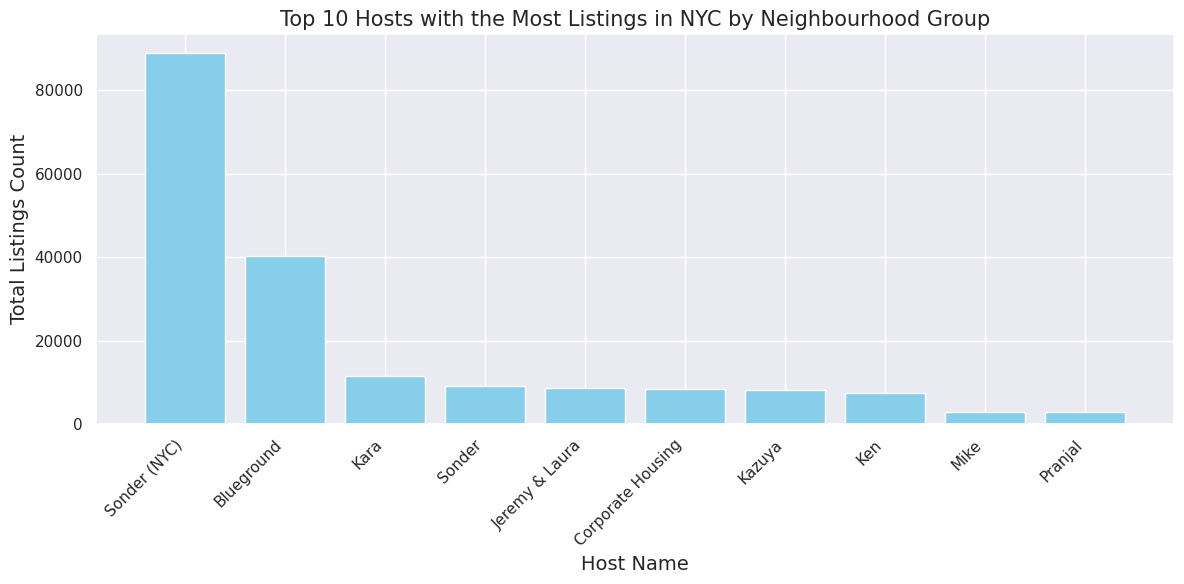

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(largest_listings_df['host_name'], largest_listings_df['calculated_host_listings_count'], color='skyblue')
plt.xlabel('Host Name', fontsize=14)
plt.ylabel('Total Listings Count', fontsize=14)
plt.title('Top 10 Hosts with the Most Listings in NYC by Neighbourhood Group', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Nhận xét:**
* Sonder (NYC) là người chủ sở hữu nhiều danh sách cho thuê nhất ở NYC, với số lượng vượt trội gần 9000 căn. Điều này cho thấy Sonder (NYC) có ảnh hưởng lớn trong thị trường này. Bên cạnh đó, hầu như tất cả các căn cho thuê đều thuộc quận Manhattan.




---
**(23) Đâu là những chủ nhà (host) hàng đầu dựa trên doanh thu của họ?**



In [ ]:
# copy of the non_null_file
new=data.copy()
# replace whose price less than 50
new.loc[new['price']<50,'price'] = new.loc[(new['price']>50) & (new['price']<80),'price'].median()
#  find the maximum price across different host name
top_host=new.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
# find top three host best on their turnover
top_3=top_host.sort_values('total_price',ascending=False).iloc[:3,:3]
top_3

,host_name,host_id,total_price
31372,Sonder (NYC),219517861,56166
4573,Blueground,107434423,49149
17893,Kara,30283594,20885


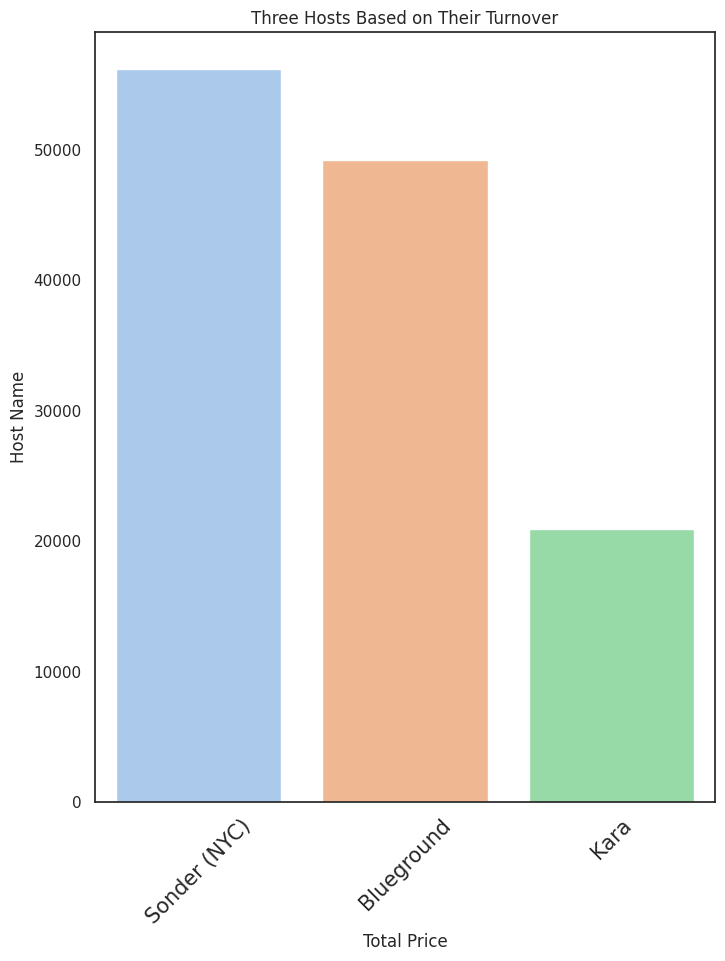

In [ ]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_style('white')

colors = sns.color_palette('pastel', len(top_3))

abc = sns.barplot(x='host_name', y='total_price', data=top_3, palette=colors)

abc.set_title('Three Hosts Based on Their Turnover')

abc.set_ylabel('Host Name')
abc.set_xlabel('Total Price')
abc.set_xticklabels(abc.get_xticklabels(), rotation=45, size=15)

plt.show()


**Nhận xét:**
* Như ta đã phân tích trước đó là Sonder(NYC), Blueground và Kara là top 3 những host có số lượng danh sách và theo đó họ cũng là 3 host có doanh thu cao nhất trên Airbnb.





---
**(24) Sự phân bổ của số lượng chủ nhà hoạt động trong từng quận ở NYC như thế nào?**


In [ ]:
# create a new DataFrame that displays the number of hosts in each neighborhood group in the Airbnb NYC dataset
hosts_per_location = data.groupby('neighbourhood_group')['id'].count().reset_index()

# rename the columns of the resulting DataFrame to 'Neighbourhood_Groups' and 'Host_counts'
hosts_per_location.columns = ['Neighbourhood_Groups', 'Host_counts']

# display the resulting DataFrame
hosts_per_location



,Neighbourhood_Groups,Host_counts
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


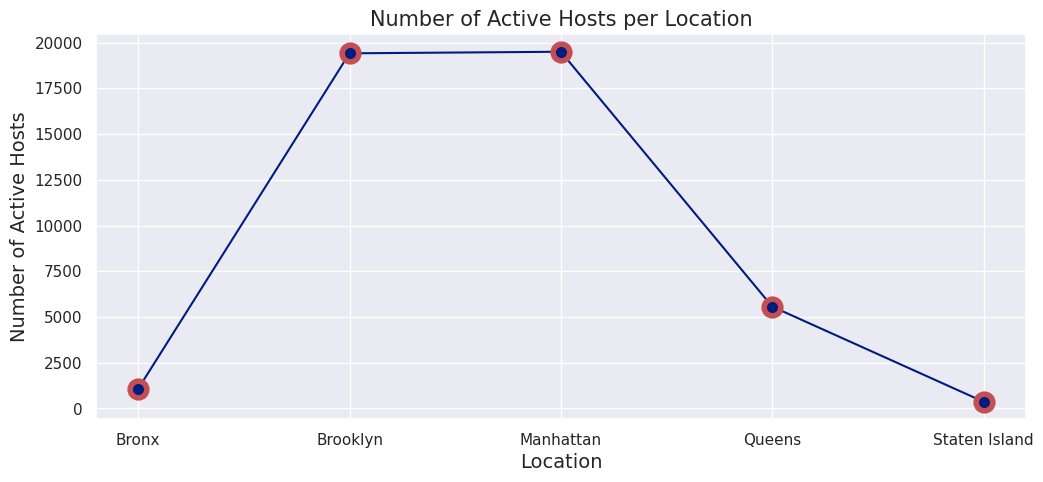

In [ ]:
hosts_per_location = data.groupby('neighbourhood_group')['id'].count()

locations = hosts_per_location.index
host_counts = hosts_per_location.values

plt.figure(figsize=(12, 5))

plt.plot(locations, host_counts, marker='o', ms=12, mew=4, mec='r')

plt.title('Number of Active Hosts per Location', fontsize='15')
plt.xlabel('Location', fontsize='14')
plt.ylabel('Number of Active Hosts', fontsize='14')

plt.show()

**Nhận xét:**
* Manhattan có số lượng chủ nhà đông đảo nhất, tiếp đến là Brooklyn và Staten Island có số lượng chủ nhà ít nhất với 365 host.
* Brooklyn và Manhattan có số lượng chủ nhà lớn nhất, với số lượng chủ nhà nhiều hơn gấp đôi ở Queens và gấp hơn 18 lần số lượng chủ nhà ở Bronx.




---
**(25) Những khu vực nào có những chủ nhà (host) thu hút khách hàng nhất? Tại sao?**


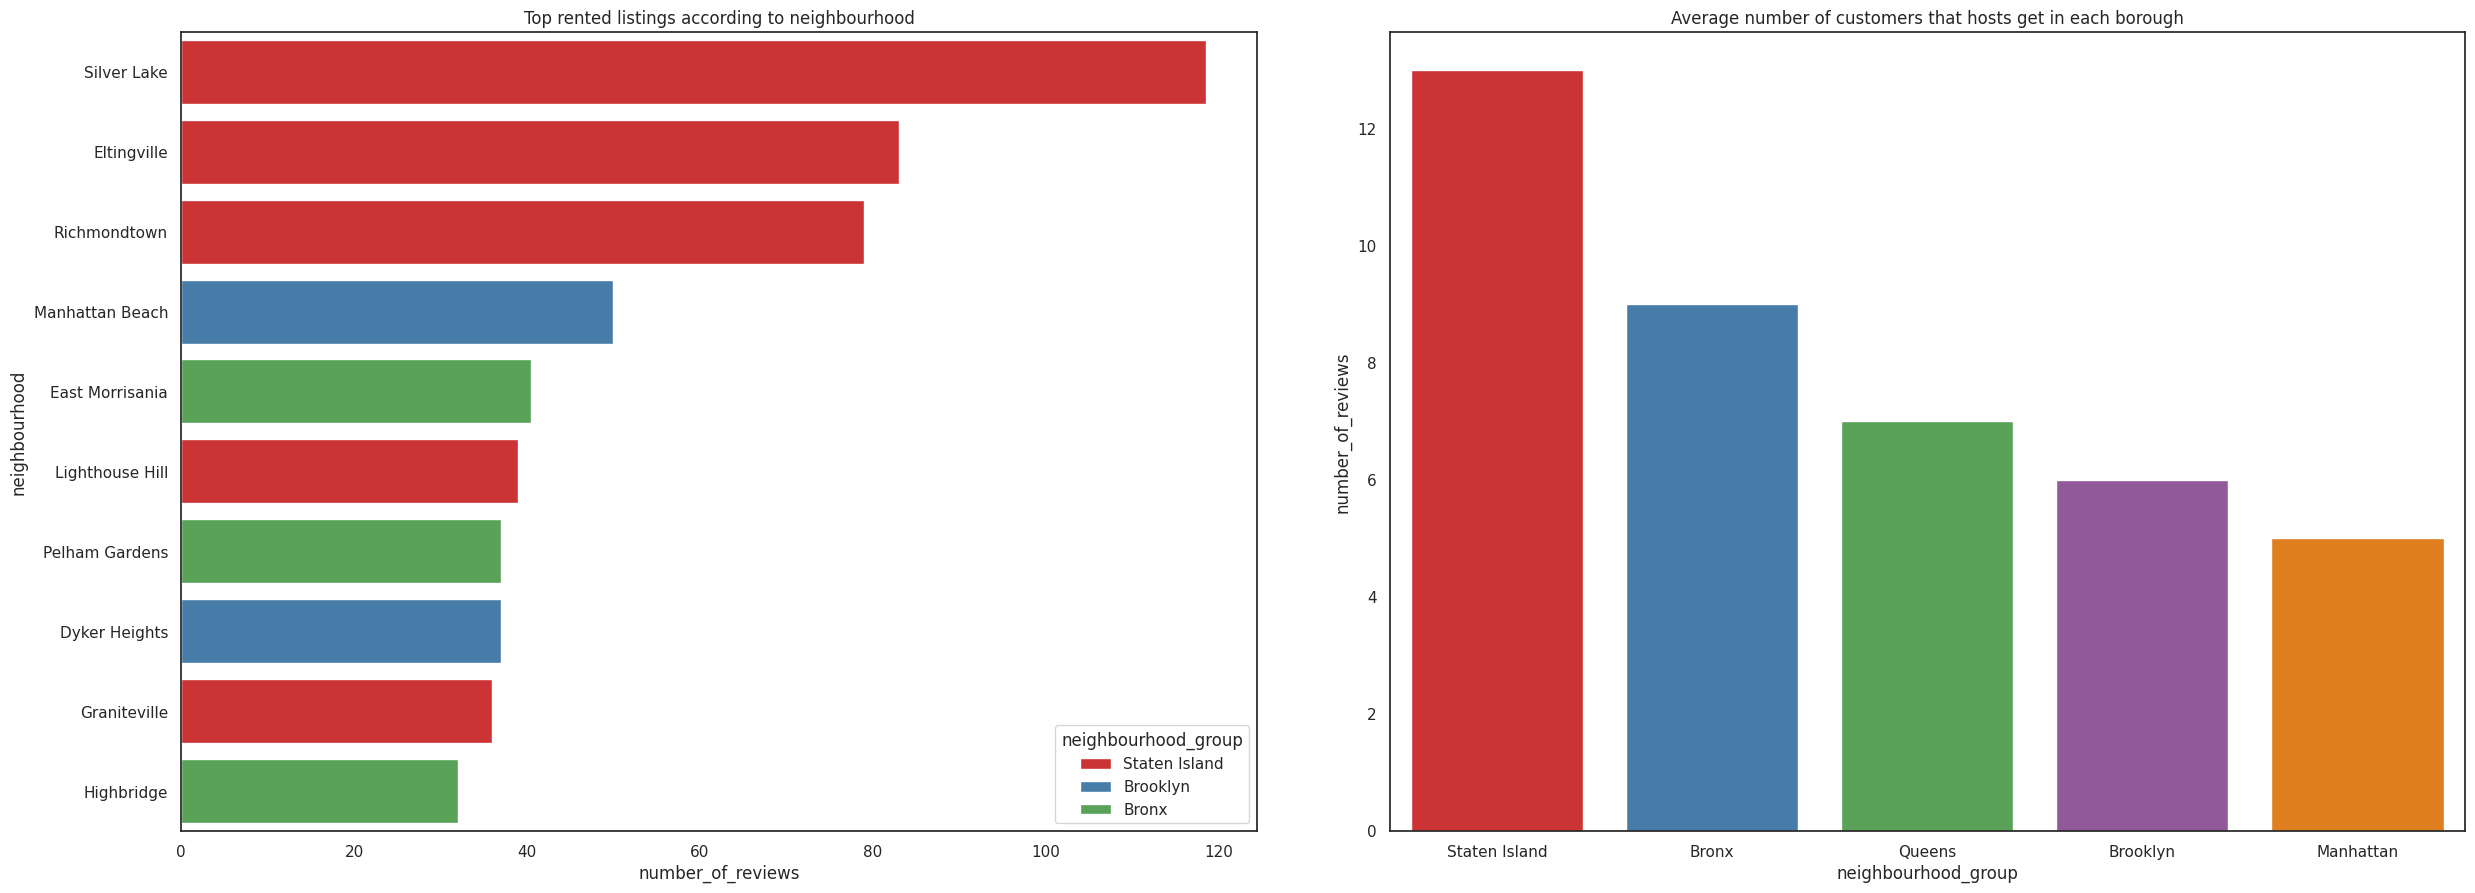

In [ ]:
top_listings = data.groupby('neighbourhood_group').median().sort_values(by = 'number_of_reviews', ascending = False).reset_index()
top10_listings = data.groupby(['neighbourhood_group', 'neighbourhood']).median().sort_values(by = 'number_of_reviews', ascending = False).reset_index().head(10)

fig, axis = plt.subplots(1, 2, figsize = (25, 10), squeeze = True)
fig.tight_layout(pad = 5)

sns.barplot(x = 'number_of_reviews', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, ax = axis[0], estimator = np.median, palette='Set1').set(title = 'Top rented listings according to neighbourhood')
sns.barplot(x = 'neighbourhood_group', y = 'number_of_reviews', data = top_listings, ci = False, dodge = False, ax = axis[1], palette='Set1').set(title = 'Average number of customers that hosts get in each borough')

plt.show()

**Nhận xét:**
* Từ những thông tin ở trên, chúng ta có thể kết luận rằng các chủ nhà (host) ở Staten Island là những người thu hút khách hàng nhiều nhất!
* Silver Lake, Eltingville và Richmondtown dường như là 3 điểm nóng hàng đầu cho các chủ nhà thu hút nhiều khách hàng nhất.

↪ Mặc dù Manhattan và Brooklyn có nhiều khách hàng và căn hộ cho thuê nhất, nhưng Staten Island có nhiều chủ nhà thu hút được khách hàng nhất, đặc biệt là ở Silver Lake, Eltingville và Richmondtown. Điều này là do ít cạnh tranh hơn, chi phí rất thấp so với các quận khác và yêu cầu về số đêm tối thiểu ít hơn, điều này thu hút nhiều khách hàng hơn.








---
**(26) Số ngày phòng trống (Availability_365) của các quận tại thành phố NewYork? Quận nào có số ngày phòng trống ít nhất?**

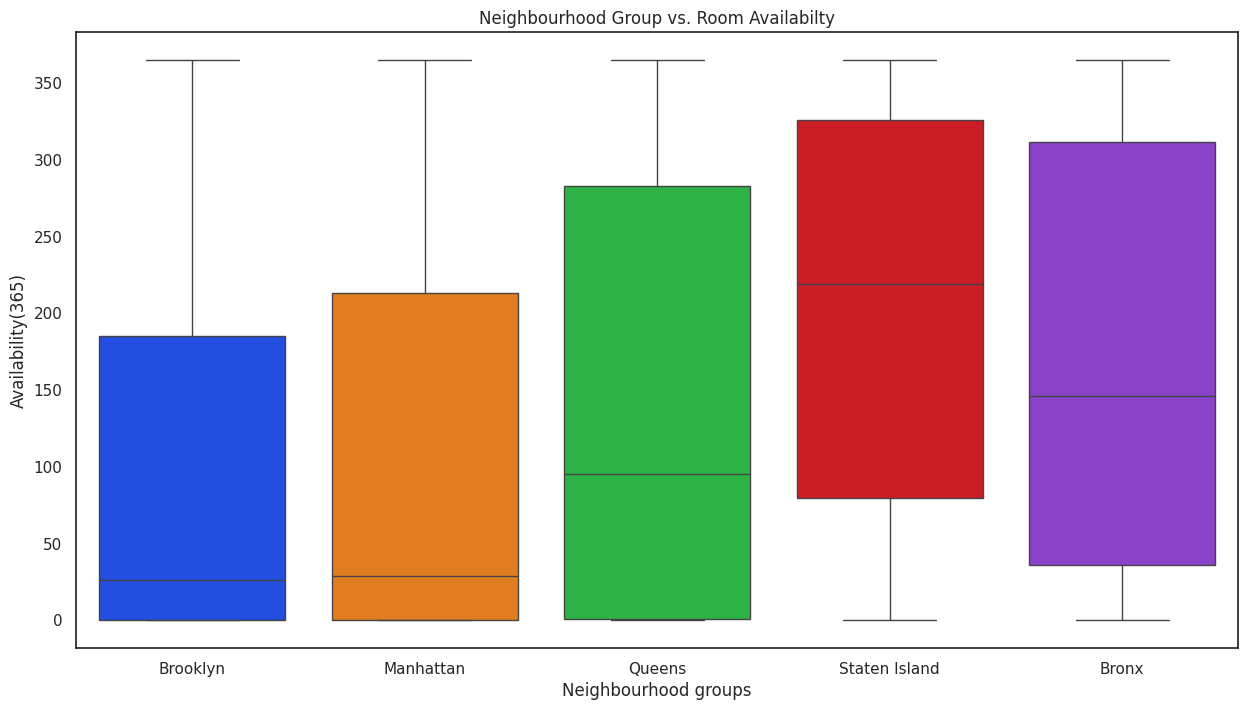

In [ ]:
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=data,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

**Nhận xét:**
* Từ biểu đồ box plot ở trên ta có thể thấy rằng Staten Island có số ngày phòng trống cao nhất trong khu vực, lên đến hơn 300 ngày; trung bình khoảng 210 ngày mỗi năm. Tiếp theo là Bronx, trung bình có khoảng 150 ngày mỗi năm.
* Quận Brooklyn là khu vực có số ngày phòng trống ít nhất và theo sau là quận Manhattan, chứng tỏ 2 quận này có nhu cầu thuê nhà ở cao nhất trong khu vực. Ta có thể lý giải Brooklyn là nơi sẽ sẽ được du khách thuê nhiều hơn Manhattan vì Brooklyn cũng cung cấp các tiện ích và trải nghiệm tương tự nhưng với mức giá thấp hơn Manhattan. Điều này là lý do chính để du khách chọn khu vực này làm nơi lưu trú.




---
**(27) Tình trạng sẵn có (Availability_365) của từng loại phòng theo từng quận?**


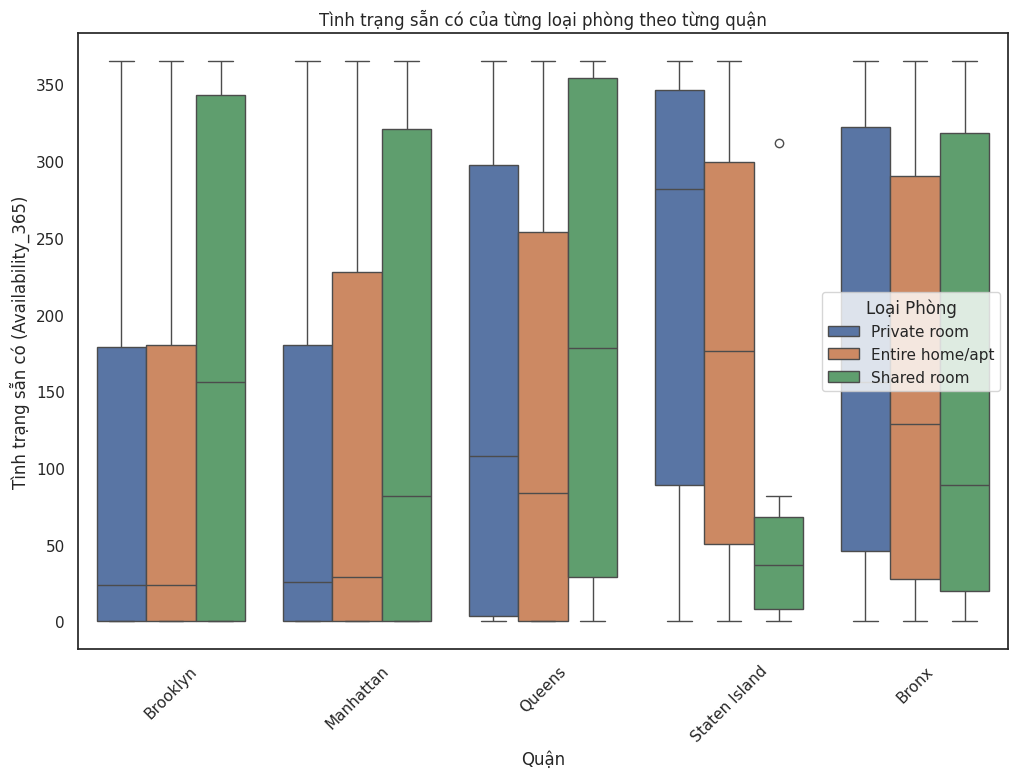

In [ ]:
# Tạo biểu đồ boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='availability_365', hue='room_type', data=data)
plt.title('Tình trạng sẵn có của từng loại phòng theo từng quận')
plt.xlabel('Quận')
plt.ylabel('Tình trạng sẵn có (Availability_365)')
plt.xticks(rotation=45)
plt.legend(title='Loại Phòng')
plt.show()

**Nhận xét:**
* Đối với private room, hầu hết các phòng ở Staten Island và Bronx đều có sẵn suốt cả năm so với các quận khác.
* Loại phòng Entire home/apt ở NYC thường không có sẵn suốt cả năm, nhiều nhất là ở Staten Island và Bronx với khoảng 200 ngày.
* Đối với Share room, Brooklyn và Queens thường có sẵn quanh năm trong khi đó thì Staten Island chỉ có sẵn dưới 100 ngày.



---

**(28) Phân bố loại phòng (room_types) trên toàn bộ NYC như thế nào?**

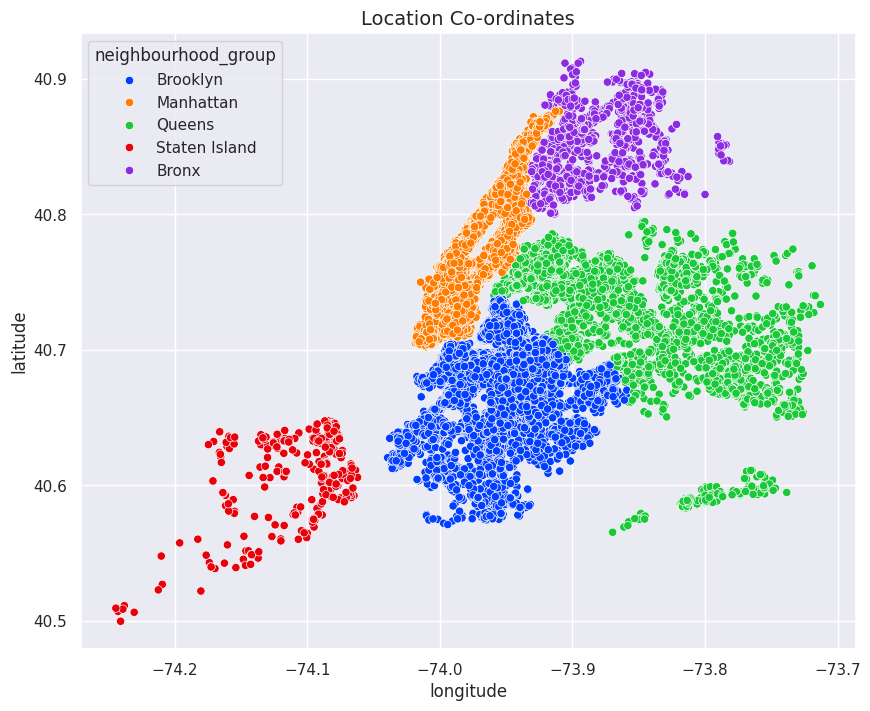

In [ ]:
#trying to find where the coordinates belong from the latitude and longitude
# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})
# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset
ax = sns.scatterplot(data=data, x="longitude", y="latitude", hue='neighbourhood_group', palette='bright')
# set the title of the plot
ax.set_title('Location Co-ordinates', fontsize='14');

**Nhận xét:**
* Ta thấy rằng Manhattan và Brookyn có mật đô nhà ở dày đặc nhất như đã phân tích ở trên.
* Queens có các điểm rải rác ở phía bên phải và phần trên giữa của biểu đồ, cho thấy sự mật độ phân bố dân cư rộng lớn.


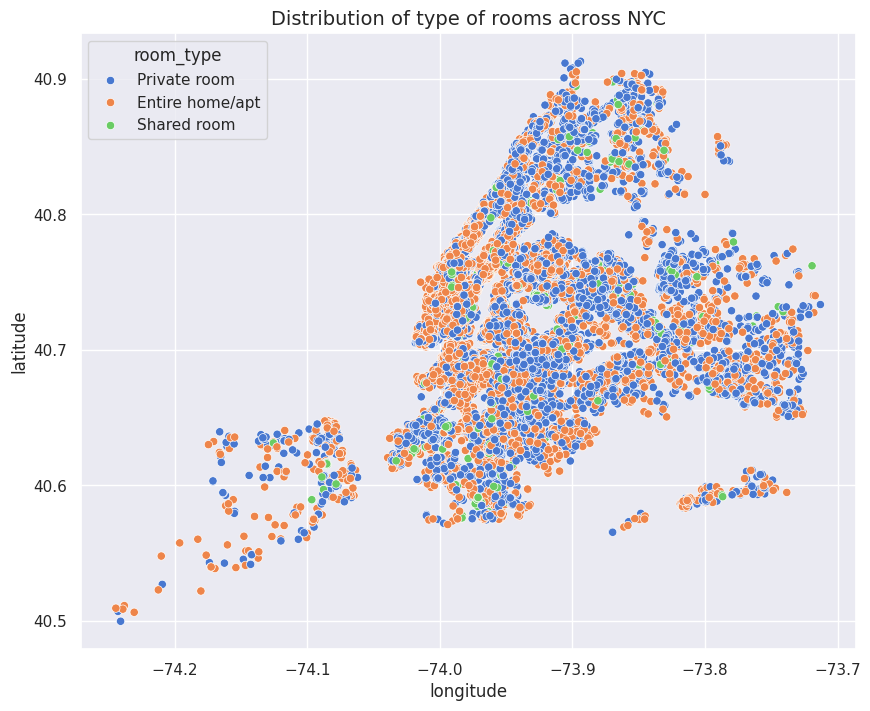

In [ ]:
# Let's observe the type of room_types
# set the default figure size for the seaborn library
sns.set(rc={"figure.figsize": (10, 8)})
# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset with room_types.
ax = sns.scatterplot(x=data.longitude, y=data.latitude, hue=data.room_type, palette='muted')
# set the title of the plot
ax.set_title('Distribution of type of rooms across NYC', fontsize='14');

**Nhận xét:**
* Từ biểu đồ trên ta có thể suy luận rằng có rất ít shared room trong toàn bộ NYC so với private room và entire home/apt

* 95% của các danh sách trên Airbnb là private room  hoặc  entire home/apt. Rất ít khách đã chọn shared room trên Airbnb.

* Ngoài ra, khách hàng chủ yếu yêu thích "Entire home/apt"  khi họ tìm kiếm thuê nhà trên Airbnb như ta đã phát hiện trong phân tích trước đó.









---
**Trực quan biểu đồ giá sử dụng scatter plot**


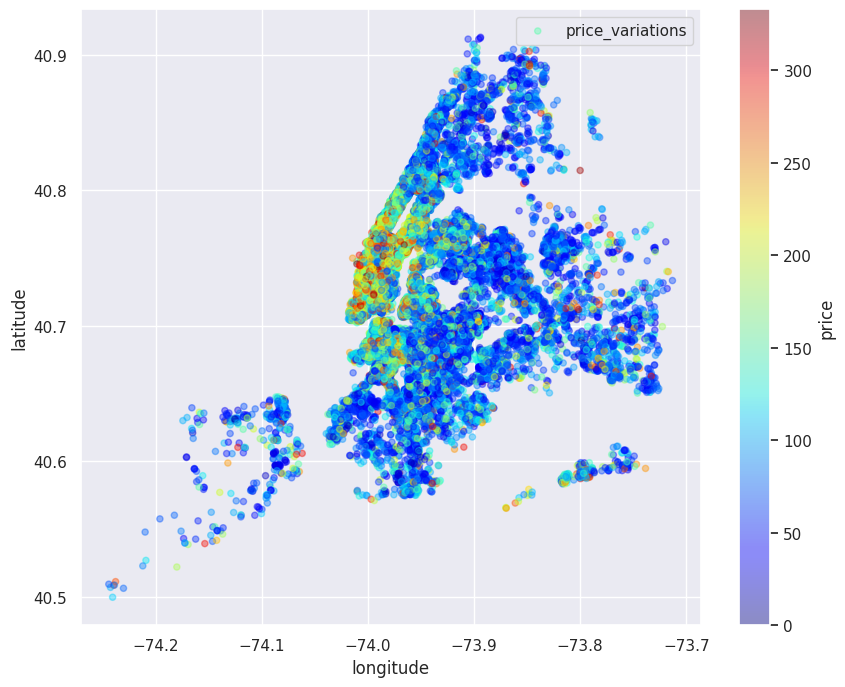

In [ ]:
# Let's have an idea of the price variations in neighborhood_groups
# create a scatter plot that displays the longitude and latitude of the listings in the Airbnb NYC dataset, with the color of each point indicating the price of the listing
lat_long = data.plot(kind='scatter', x='longitude', y='latitude', label='price_variations', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10, 8))
# add a legend to the plot
lat_long.legend();


**Nhận xét -->**

*   Phạm vi giá cho chỗ ở tại Manhattan đặc biệt cao, cho thấy đây là nơi lưu trú đắt nhất ở NYC.




## Kết luận:
*	Phạm vi giá trên Airbnb dao động từ 20 đến 330 đô-la, và mật độ cao nhất trong khoảng từ 50 đến 150 đô-la.
*	Giá trung bình cho thuê nhà ở tại New York rất đa dạng, có sự chệnh lệnh khá cao về khoảng giá giữa các quận. Chi phí sinh hoạt chung ở Thành phố New York ở trung tâm thành phố (Manhattan) cao hơn so với các quận ngoại ô. Điều này có thể là do Manhattan là quận đông dân nhất và có tầm quan trọng về mặt thương mại, do đó có nhu cầu nhà ở cao hơn ở các khu vực ngoại ô.
*	Tất cả các khu dân cư có mức giá trung bình thấp nhất đều nằm ngoài khu vực trung tâm thành phố (Bronx, Queens, and Staten Island). Những khu dân cư này có thể hấp dẫn đối với người thuê nhà hoặc người mua đang tìm kiếm các lựa chọn nhà ở giá cả phải chăng hơn trong khu vực Thành phố New York.
*	Quận Manhattan và Brooklyn có mật độ thuê nhà ở cao nhất (chiếm hơn 80%) và Staten Island có mật độ thấp nhất. Ta có thể thấy rằng, khu vực Manhattan và Brooklyn là khu vực có tiềm năng nhất. Ta nên tập trung quảng bá hình ảnh và lập ra các chiến lược để thu hút đầu tư và khách thuê nhà vào khu vực này.
*	Phần lớn trên Airbnb là cho thuê toàn bộ ngôi nhà hoặc căn hộ (Entire home/apt) và loại phòng share room ít phổ biến nhất trên Airbnb.
*	Sự chênh lệch giữa giá trung bình của Private room và Shared room là không nhiều nhưng có sự khác biệt rất lớn (gấp đôi) về loại phòng Entire home/apt so với các loại phòng khác.
*	Giá trung bình của một căn nhà ở Thành phố New York ở trung tâm thành phố (Manhattan) cao hơn so với các quận bên ngoài. Điều này có thể chỉ ra rằng đầu tư vào bất động sản ở Manhattan có thể mang lại nhiều lợi nhuận hơn cho việc cho thuê trên Airbnb. Nhưng Manhattan và Brooklyn có số lượng chủ nhà lớn nhất, cho thấy mức độ cạnh tranh cao ở các quận này.
* Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick và Upper West Side là những khu dân cư hàng đầu về số lượng nhà cho thuê, cho thấy nhu cầu thuê Airbnb ở những khu vực này rất mạnh mẽ.
*	 Dữ liệu cho thấy dịch vụ cho thuê của Airbnb chủ yếu được sử dụng cho các kỳ lưu trú ngắn hạn, với tương đối ít phòng cho thuê yêu cầu thời gian lưu trú tối thiểu từ 30 đêm trở lên. Chủ đầu tư có thể muốn xem xét đầu tư vào bất động sản có thể đáp ứng thời gian lưu trú ngắn để đạt được lợi nhuận tốt nhất.
*	Các quận trung tâm (Manhattan, Brooklyn) có xu hướng thu hút thời gian lưu trú dài hơn các quận khác.
*	Để đạt được nhiều lượt đánh giá, các chủ nhà (host) có thể đưa ra những chương trình khuyến mãi, chiến lược giảm giá để đạt được nhiều sự đánh giá hơn và thông qua đó tăng tính cạnh tranh và thu hút được nhiều khách hàng hơn.
*	Mặc dù Manhattan và Brooklyn có nhiều khách hàng và căn hộ cho thuê nhất, nhưng Staten Island có nhiều chủ nhà thu hút được khách hàng nhất. Điều này là do ít cạnh tranh hơn, chi phí rất thấp so với các quận khác và yêu cầu về số đêm tối thiểu ít hơn, điều này thu hút nhiều khách hàng hơn.
*	Quận Brooklyn là khu vực có số ngày phòng trống ít nhất và theo sau là quận Manhattan, chứng tỏ 2 quận này có nhu cầu thuê nhà ở cao nhất trong khu vực. Ta có thể lý giải Brooklyn là nơi sẽ sẽ được du khách thuê nhiều hơn Manhattan vì Brooklyn cũng cung cấp các tiện ích và trải nghiệm tương tự nhưng với mức giá thấp hơn Manhattan. Điều này là lý do chính để du khách chọn khu vực này làm nơi lưu trú.
*	Brooklyn đứng thứ hai với số lượng nhà cho thuê và giá rẻ hơn so với Manhattan: Với hầu hết các danh sách nằm ở Williamsburg và Bedford Stuyvesant, hai khu phố gần Manhattan về mặt chiến lược, khách du lịch có cơ hội tận hưởng cả hai quận như nhau trong khi chi tiêu ít hơn. Nhóm đề xuất rằng khách du lịch có thể thuê ở các khu phố ở Brooklyn để có thể tận hưởng được cả địa điểm du lịch ở 2 quận Manhattan và Brooklyn với giá cả phải chăng và phù hợp với phần đông khách hàng hơn.
*	Như ta đã phân tích ở trên, thì nhóm đã rút ra một số thông tin rằng Manhattan và Brooklyn có nhu cầu thuê Airbnb cao nhất, giá cả ở 2 khu vực này thuộc top những vị trí có giá cao nhất và tình trạng sẵn có để cho thuê ở mức thấp nhất so với các khu vực còn lại. Điều đó cho thấy khách hàng thuê Airbnb rất thích thuê ở 2 khu vực này nên đây có thể khiến chúng trở thành khu vực hấp dẫn để chủ nhà đầu tư vào bất động sản. Nhưng Manhattan và Brooklyn có số lượng chủ nhà lớn nhất, cho thấy mức độ cạnh tranh cao ở các quận này.


In [ ]:
a = 15%2
print(a)

1
